# Load the Data

In [1]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display the first few rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Types

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Correlation Matrix

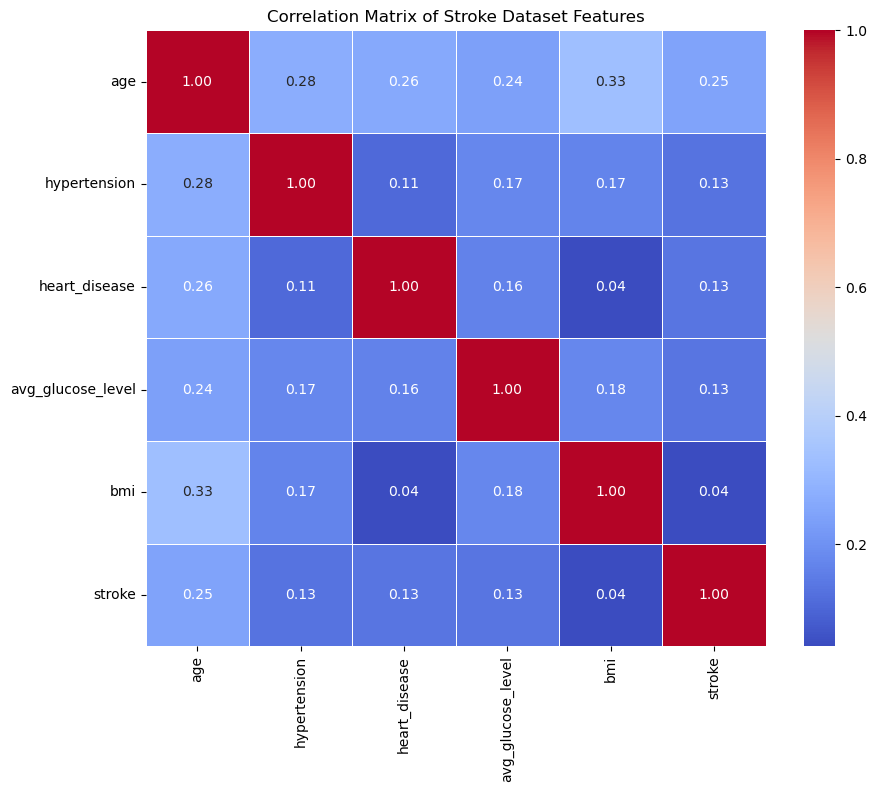

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Drop the 'id' column, and non-numerical columns to calculate correlation
df_corr = df.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stroke Dataset Features')
plt.show()

## 2.3 Independent Variable

### 2.3.1 Gender

In [6]:
# Calculate counts of each gender
Gender = df['gender'].value_counts()

# Calculate total number of gender entries
Gender_total = df['gender'].value_counts().sum()

# Print results
print("Gender Counts:\n", Gender)
print("Total value of Gender:", Gender_total)

Gender Counts:
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Total value of Gender: 5110


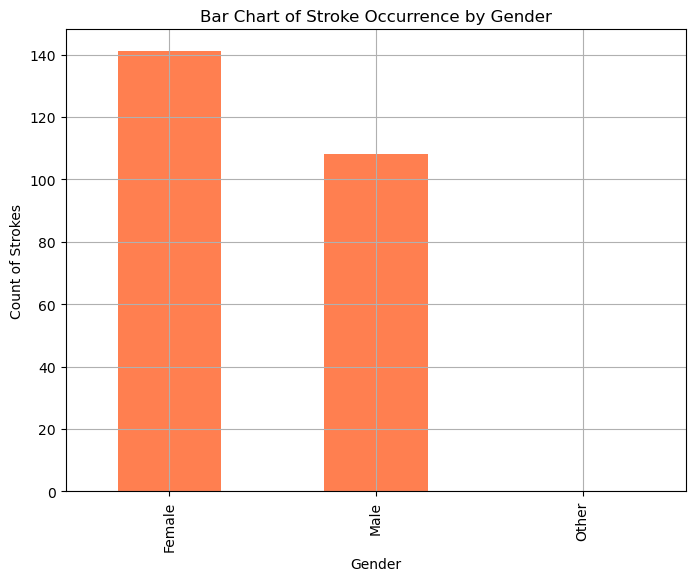

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot the DataFrame to get count of strokes by gender
pivot_df = df.groupby('gender')['stroke'].sum()

# Plotting
pivot_df.plot(kind='bar', figsize=(8, 6), color='coral')
plt.title('Bar Chart of Stroke Occurrence by Gender')
plt.ylabel('Count of Strokes')
plt.xlabel('Gender')
plt.grid(True)
plt.show()


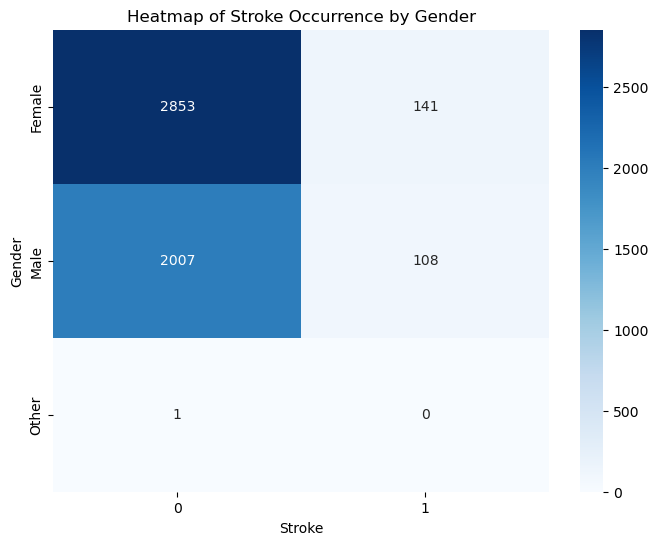

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot_df = df.pivot_table(index='gender', columns='stroke', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Stroke Occurrence by Gender')
plt.ylabel('Gender')
plt.xlabel('Stroke')
plt.show()


{('Female', 0): 2853, ('Female', 1): 141, ('Male', 0): 2007, ('Male', 1): 108, ('Other', 0): 1, ('Other', 1): 0}


<Figure size 1000x700 with 0 Axes>

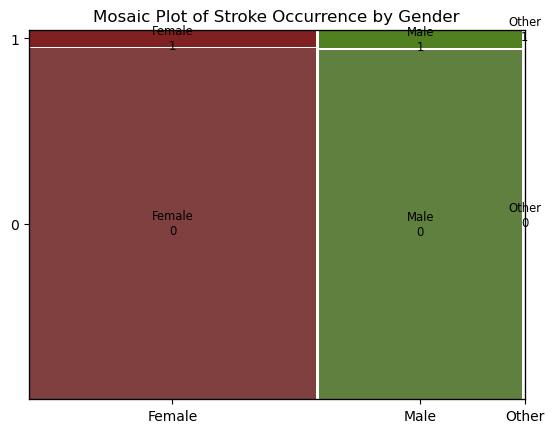

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic


# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['stroke'])

# Convert the contingency table to a dictionary
data_dict = contingency_table.stack().to_dict()

# Print the data dictionary
print(data_dict)

# Create the mosaic plot
plt.figure(figsize=(10, 7))
mosaic(data_dict, title='Mosaic Plot of Stroke Occurrence by Gender')
plt.show()

### 2.3.2 Age

In [16]:
Overview_Age = df.age.describe()

print('Summary of Age :')
print('--------------------')
print(Overview_Age)
print('--------------------')

Summary of Age :
--------------------
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64
--------------------


In [17]:
age_stroke_counts = df.groupby(['age', 'stroke']).size().unstack(fill_value=0)

# Loop through each age group
for age_group, row in age_stroke_counts.iterrows():
    print(f"Age Group: {age_group}")
    print("-----------------------")
    # Print count of each risk level for the current age group
    no_stroke_count = row.get(0, 0)  # Default to 0 if '0' is not a key
    stroke_count = row.get(1, 0)     # Default to 0 if '1' is not a key
    print(f"no stroke: {no_stroke_count}")
    print(f"stroke: {stroke_count}")
    print("\n")

Age Group: 0.08
-----------------------
no stroke: 2
stroke: 0


Age Group: 0.16
-----------------------
no stroke: 3
stroke: 0


Age Group: 0.24
-----------------------
no stroke: 5
stroke: 0


Age Group: 0.32
-----------------------
no stroke: 5
stroke: 0


Age Group: 0.4
-----------------------
no stroke: 2
stroke: 0


Age Group: 0.48
-----------------------
no stroke: 3
stroke: 0


Age Group: 0.56
-----------------------
no stroke: 5
stroke: 0


Age Group: 0.64
-----------------------
no stroke: 4
stroke: 0


Age Group: 0.72
-----------------------
no stroke: 5
stroke: 0


Age Group: 0.8
-----------------------
no stroke: 4
stroke: 0


Age Group: 0.88
-----------------------
no stroke: 5
stroke: 0


Age Group: 1.0
-----------------------
no stroke: 5
stroke: 0


Age Group: 1.08
-----------------------
no stroke: 8
stroke: 0


Age Group: 1.16
-----------------------
no stroke: 4
stroke: 0


Age Group: 1.24
-----------------------
no stroke: 8
stroke: 0


Age Group: 1.32
------------

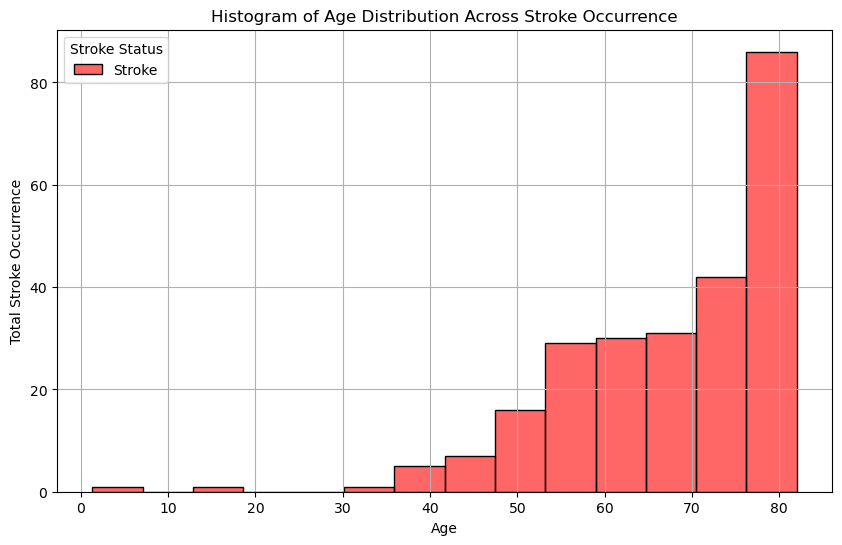

In [18]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore')

# Ensure correct values for stroke
stroke_count = 1

# Filtering DataFrame to separate cases with stroke based on the 'stroke' column
age_stroke = df.loc[df["stroke"] == stroke_count]

# Ensure age column is numeric
age_stroke["age"] = pd.to_numeric(age_stroke["age"], errors='coerce')

plt.figure(figsize=(10,6))

# Plot histograms
sns.histplot(age_stroke["age"].dropna(), kde=False, color='red', label='Stroke', alpha=0.6)

plt.legend(title='Stroke Status')
plt.title('Histogram of Age Distribution Across Stroke Occurrence')
plt.ylabel('Total Stroke Occurrence')
plt.xlabel('Age')
plt.grid()

plt.show()

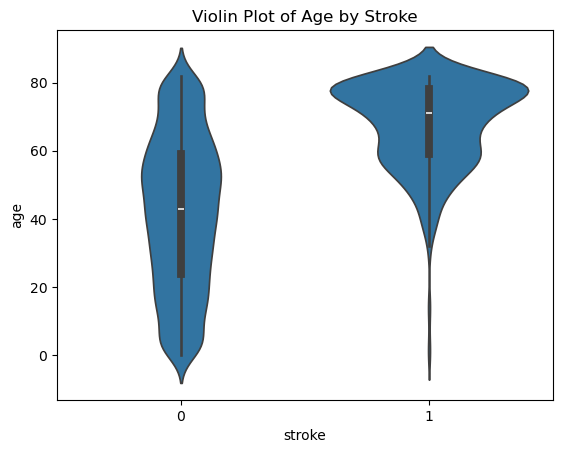

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot
sns.violinplot(x='stroke', y='age', data=df)
plt.xlabel('stroke')
plt.ylabel('age')
plt.title('Violin Plot of Age by Stroke')
plt.show()

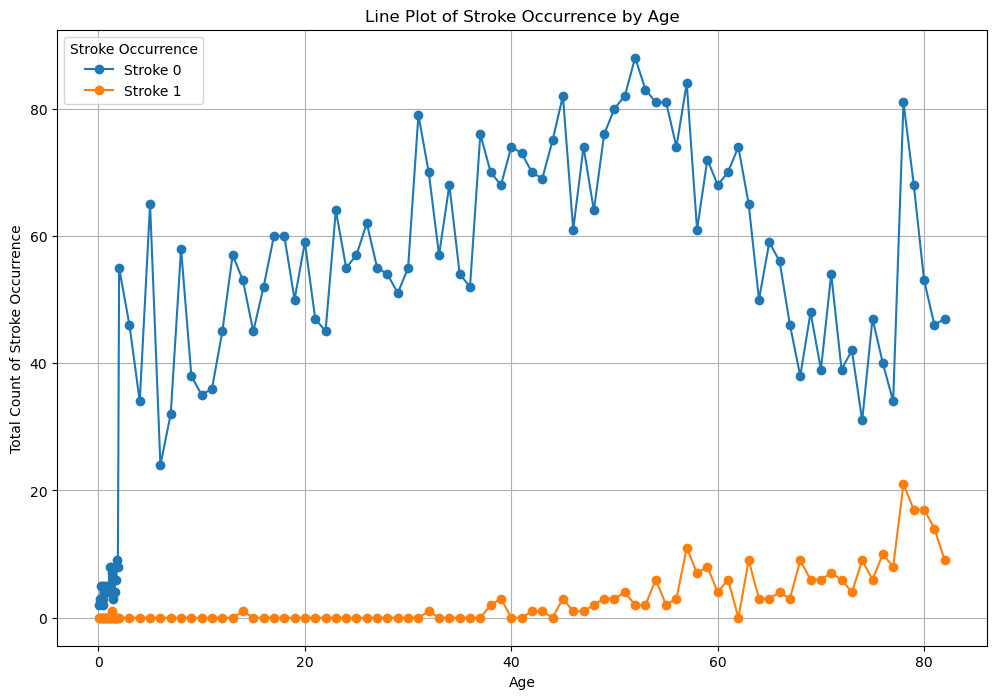

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed
# Grouping data by age and stroke, and counting occurrences
grouped_data = df.groupby(['age', 'stroke']).size().unstack(fill_value=0)

# Plotting the line plot
plt.figure(figsize=(12, 8))  # Adjust size for clarity

# Plot each category of stroke
for stroke_status in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[stroke_status], marker='o', label=f'Stroke {stroke_status}')

# Adding legend and labels
plt.title('Line Plot of Stroke Occurrence by Age')
plt.ylabel('Total Count of Stroke Occurrence')
plt.xlabel('Age')
plt.legend(title='Stroke Occurrence')
plt.grid(True)  # Adding grid lines

# Displaying the plot
plt.show()


### 2.3.3 Hypertension

In [21]:
Hypertension = df['hypertension'].value_counts()

# Calculate total number of entries
Hypertension_total = df['hypertension'].value_counts().sum()

# Print results
print("Hypertension Counts:\n", Hypertension)
print("Total value of Hypertension:", Hypertension_total)

Hypertension Counts:
 hypertension
0    4612
1     498
Name: count, dtype: int64
Total value of Hypertension: 5110


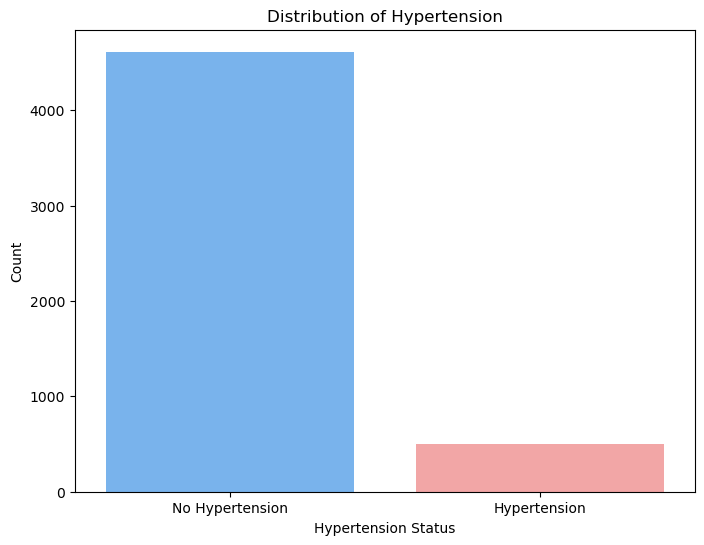

In [22]:
# Plot count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', data=df, palette=['#66b3ff', '#ff9999'])
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.title('Distribution of Hypertension')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'])
plt.show()

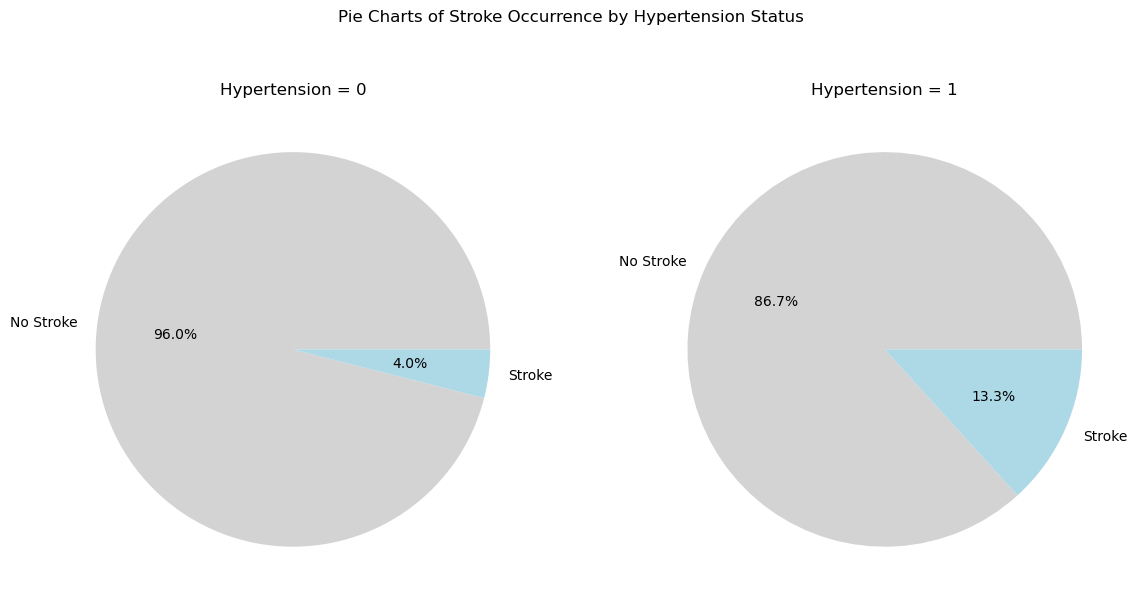

In [23]:
# Create a contingency table
contingency_table = pd.crosstab(df['hypertension'], df['stroke'])

# Plot pie charts for each hypertension category
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# For hypertension = 0
axes[0].pie(contingency_table.loc[0], labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['lightgray', 'lightblue'])
axes[0].set_title('Hypertension = 0')

# For hypertension = 1
axes[1].pie(contingency_table.loc[1], labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['lightgray', 'lightblue'])
axes[1].set_title('Hypertension = 1')

plt.suptitle('Pie Charts of Stroke Occurrence by Hypertension Status')
plt.show()

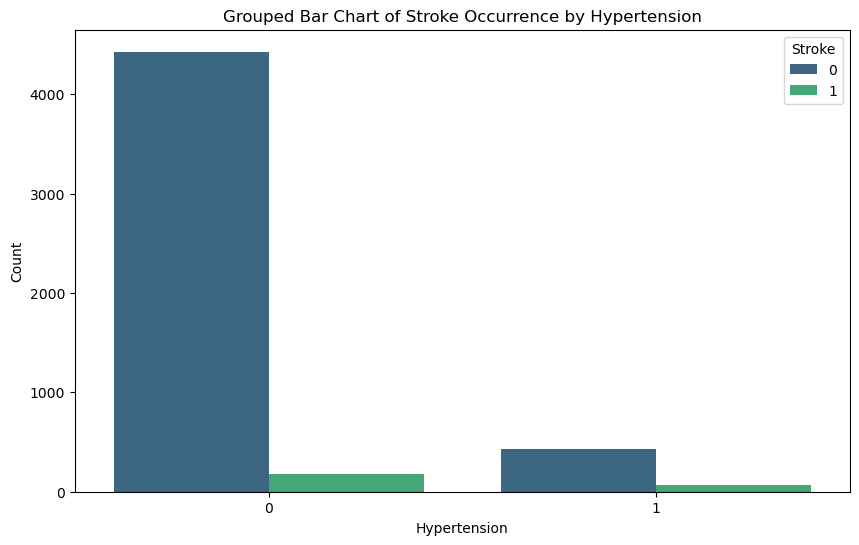

In [24]:
# Create a contingency table
contingency_table = pd.crosstab(df['hypertension'], df['stroke'])

# Reset index to use in seaborn
contingency_table = contingency_table.reset_index()

# Melt the table to long format
melted_table = contingency_table.melt(id_vars='hypertension', var_name='stroke', value_name='count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='hypertension', y='count', hue='stroke', data=melted_table, palette='viridis')
plt.title('Grouped Bar Chart of Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

### 2.3.4 Heart Disease

In [25]:
HeartDisease = df['heart_disease'].value_counts()

# Calculate total number of entries
HeartDisease_total = df['heart_disease'].value_counts().sum()

# Print results
print("Heart Disease Counts:\n", HeartDisease)
print("Total value of Heart Disease:", HeartDisease_total)

Heart Disease Counts:
 heart_disease
0    4834
1     276
Name: count, dtype: int64
Total value of Heart Disease: 5110


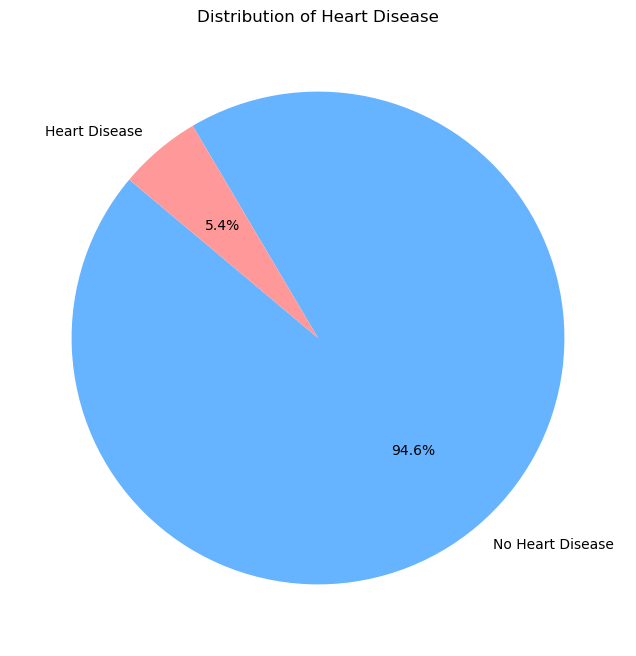

In [26]:
# Count occurrences of each heart disease status
heart_disease_counts = df['heart_disease'].value_counts()

# Map numerical values to labels
labels = {0: 'No Heart Disease', 1: 'Heart Disease'}

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    heart_disease_counts, 
    labels=[labels[i] for i in heart_disease_counts.index],
    autopct='%1.1f%%', 
    colors=['#66b3ff', '#ff9999'],
    startangle=140
)
plt.title('Distribution of Heart Disease')
plt.show()

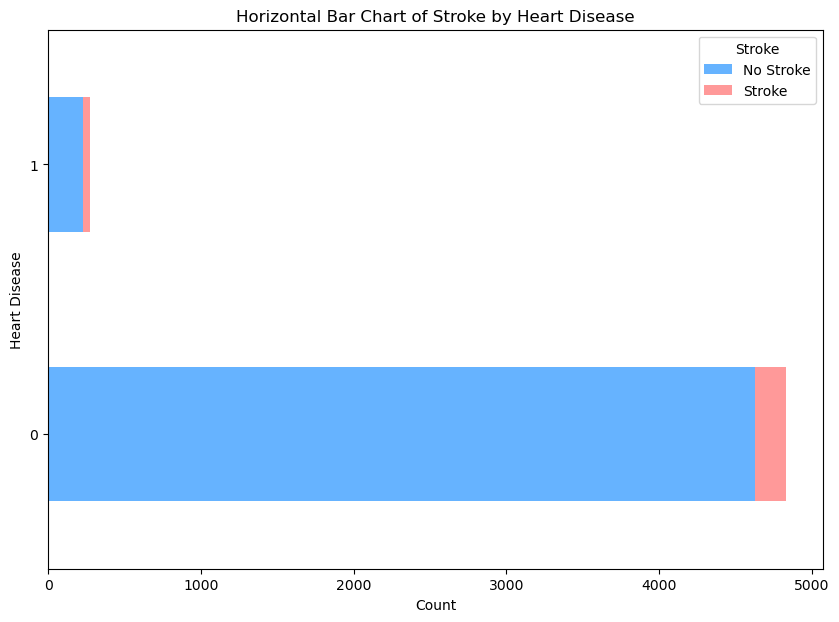

In [27]:
# Create a contingency table
contingency_table = pd.crosstab(df['heart_disease'], df['stroke'])

# Plot horizontal bar chart
contingency_table.plot(kind='barh', stacked=True, figsize=(10, 7), color=['#66b3ff', '#ff9999'])
plt.title('Horizontal Bar Chart of Stroke by Heart Disease')
plt.xlabel('Count')
plt.ylabel('Heart Disease')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

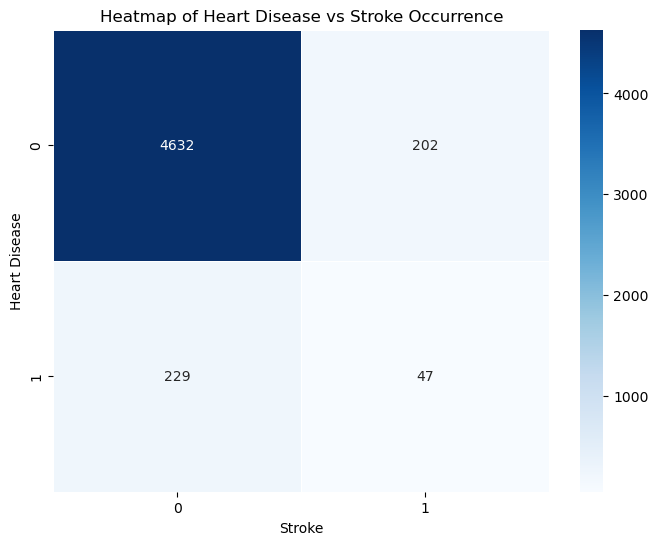

In [28]:
# Create a contingency table
contingency_table = pd.crosstab(df['heart_disease'], df['stroke'])

# Plot heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Heatmap of Heart Disease vs Stroke Occurrence')
plt.xlabel('Stroke')
plt.ylabel('Heart Disease')
plt.show()

### 2.3.5 Ever Married

In [29]:
# Calculate counts of each category in the 'ever_married' column
ever_married_counts = df['ever_married'].value_counts()

# Calculate total number of entries in the 'ever_married' column
total_ever_married = df['ever_married'].count()

# Print results
print("Ever Married Counts:\n", ever_married_counts)
print("Total number of Ever Married entries:", total_ever_married)

Ever Married Counts:
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64
Total number of Ever Married entries: 5110


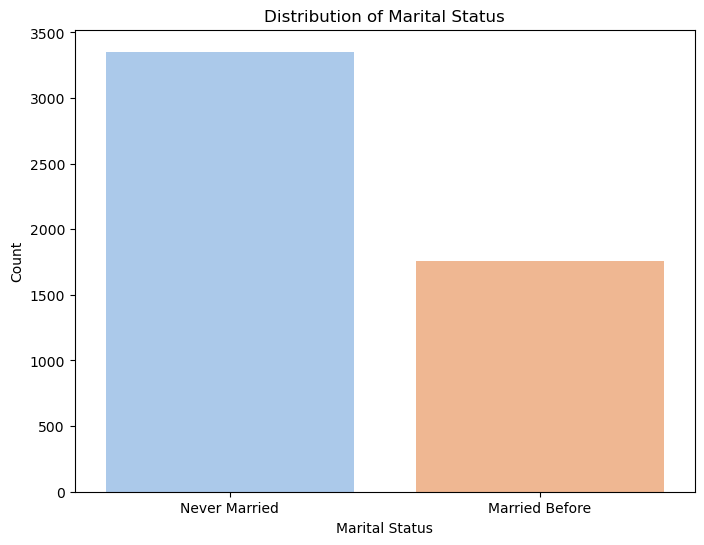

In [30]:
# Plot count plot with a built-in palette
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', data=df, palette='pastel')  # Change palette here
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(ticks=[0, 1], labels=['Never Married', 'Married Before'])
plt.show()


<Figure size 1000x700 with 0 Axes>

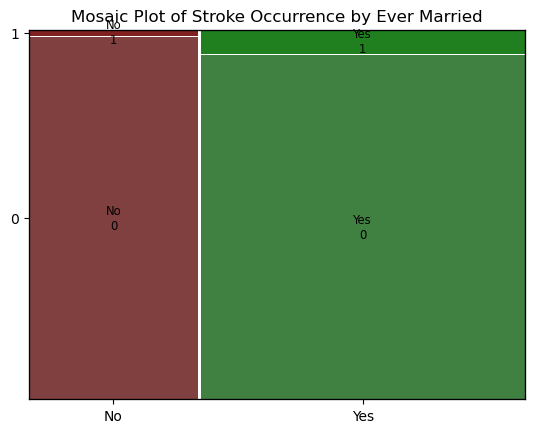

In [31]:
# Create a contingency table
contingency_table = pd.crosstab(df['ever_married'], df['stroke'])

# Convert to dictionary
data_dict = contingency_table.stack().to_dict()

# Create the mosaic plot
plt.figure(figsize=(10, 7))
mosaic(data_dict, title='Mosaic Plot of Stroke Occurrence by Ever Married')
plt.show()

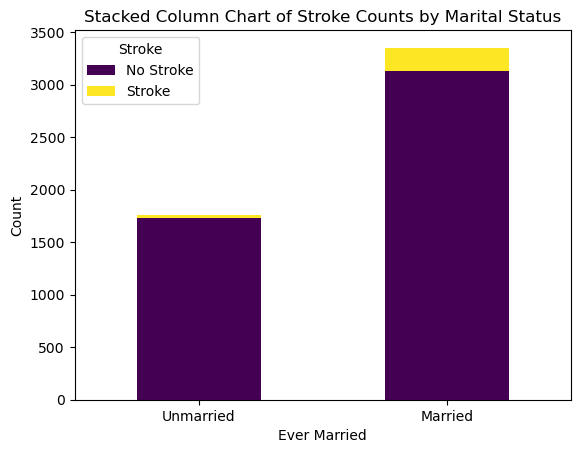

In [32]:
pivot_data = df.groupby(['ever_married', 'stroke']).size().unstack(fill_value=0)

# Plot
ax = pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

# Adding titles and labels
plt.title('Stacked Column Chart of Stroke Counts by Marital Status')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Unmarried', 'Married'], rotation=0)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Display plot
plt.show()

### 2.3.6 Work Type

In [33]:
# Calculate counts of each category in the 'ever_married' column
work_type_counts = df['work_type'].value_counts()

# Calculate total number of entries in the 'ever_married' column
total_work_type = df['work_type'].count()

# Print results
print("Work Type Counts:\n", work_type_counts)
print("Total number of Work Type entries:", total_work_type)

Work Type Counts:
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Total number of Work Type entries: 5110


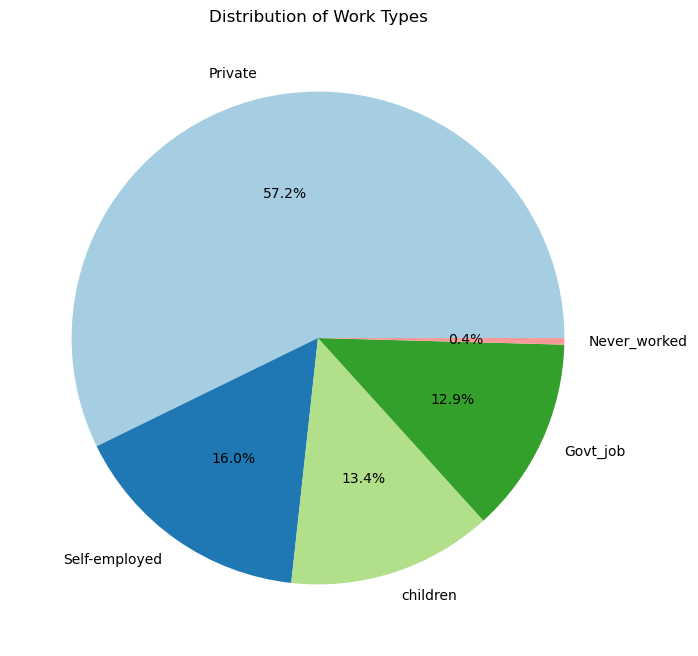

In [34]:
work_type_counts = df['work_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(work_type_counts))))
plt.title('Distribution of Work Types')
plt.show()

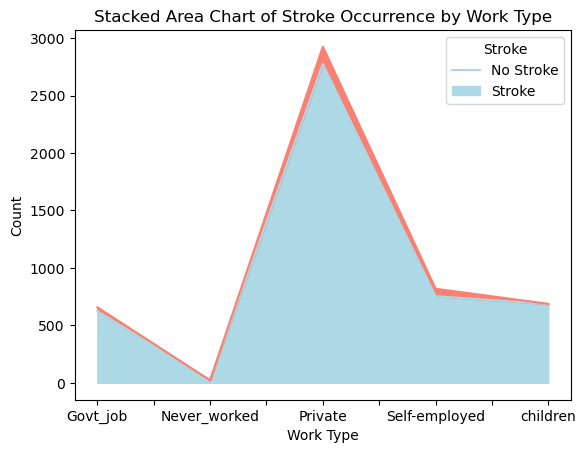

In [35]:
# Create a contingency table
contingency_table = pd.crosstab(df['work_type'], df['stroke'])

# Plot stacked area chart
contingency_table.plot(kind='area', stacked=True, color=['lightblue', 'salmon'])
plt.title('Stacked Area Chart of Stroke Occurrence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

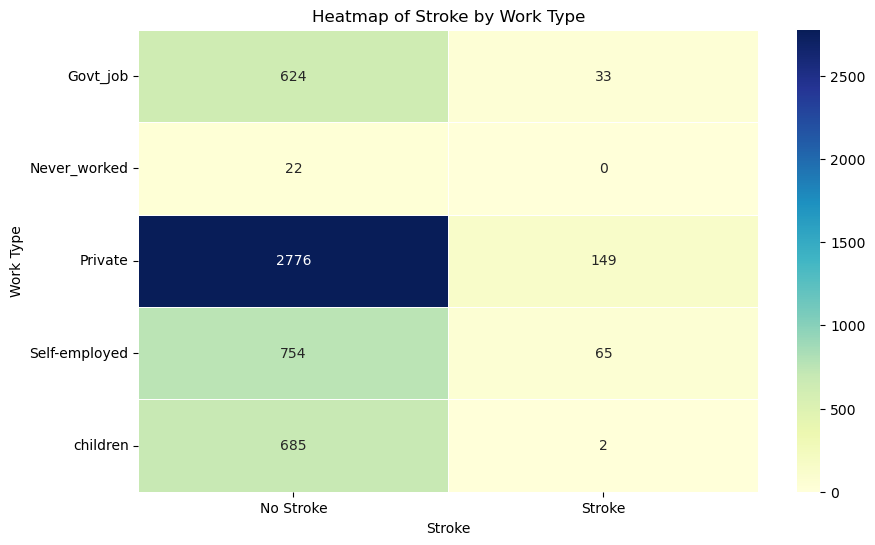

In [36]:
# Create a contingency table
contingency_table = pd.crosstab(df['work_type'], df['stroke'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('Heatmap of Stroke by Work Type')
plt.xlabel('Stroke')
plt.ylabel('Work Type')
plt.xticks(ticks=[0.5, 1.5], labels=['No Stroke', 'Stroke'])
plt.yticks(ticks=[i + 0.5 for i in range(len(contingency_table.index))], labels=contingency_table.index, rotation=0)
plt.show()

### 2.3.7 Residence Type

In [37]:
# Calculate counts of each category in the 'ever_married' column
residence_type_counts = df['Residence_type'].value_counts()

# Calculate total number of entries in the 'ever_married' column
total_residence_type = df['Residence_type'].count()

# Print results
print("Residence Type Counts:\n", residence_type_counts)
print("Total number of Residence Type entries:", total_residence_type)

Residence Type Counts:
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
Total number of Residence Type entries: 5110


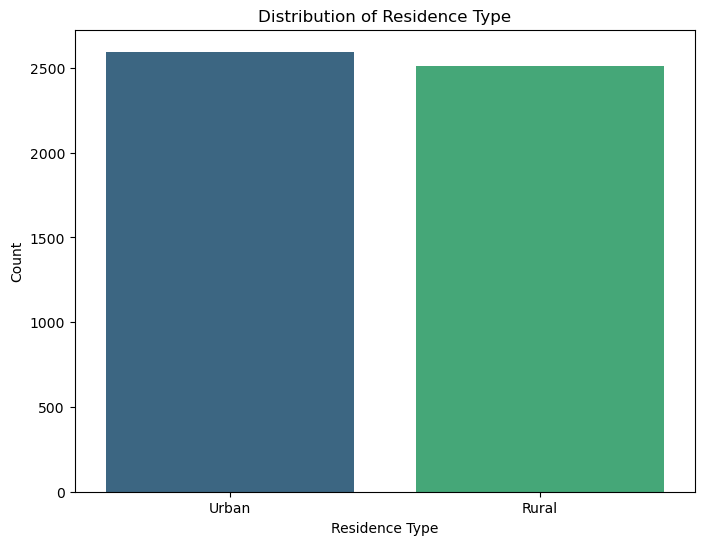

In [38]:
# Plot bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type', data=df, palette='viridis')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Distribution of Residence Type')
plt.show()

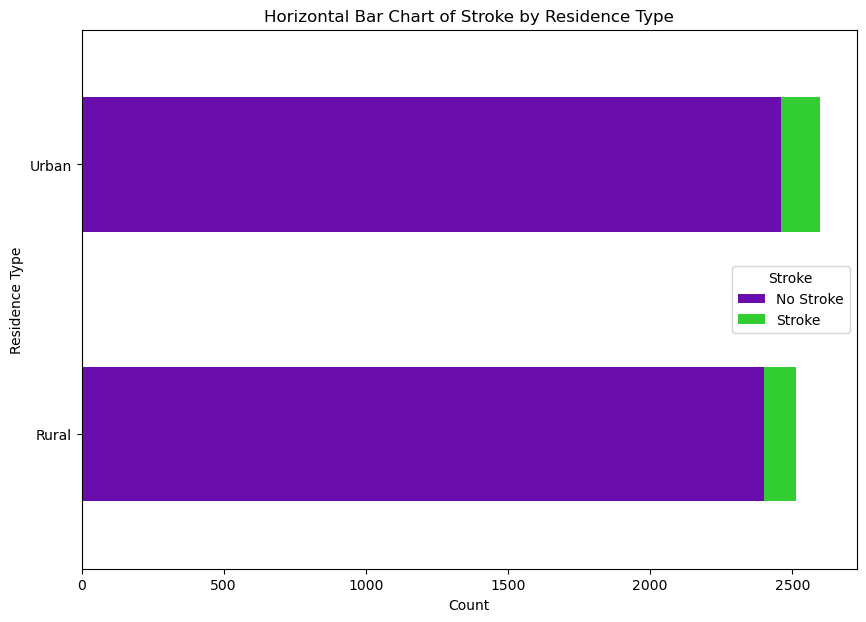

In [39]:
# Create a contingency table
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])

# Plot horizontal bar chart
contingency_table.plot(kind='barh', stacked=True, figsize=(10, 7), color=['#6a0dad', '#32cd32'])
plt.title('Horizontal Bar Chart of Stroke by Residence Type')
plt.xlabel('Count')
plt.ylabel('Residence Type')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

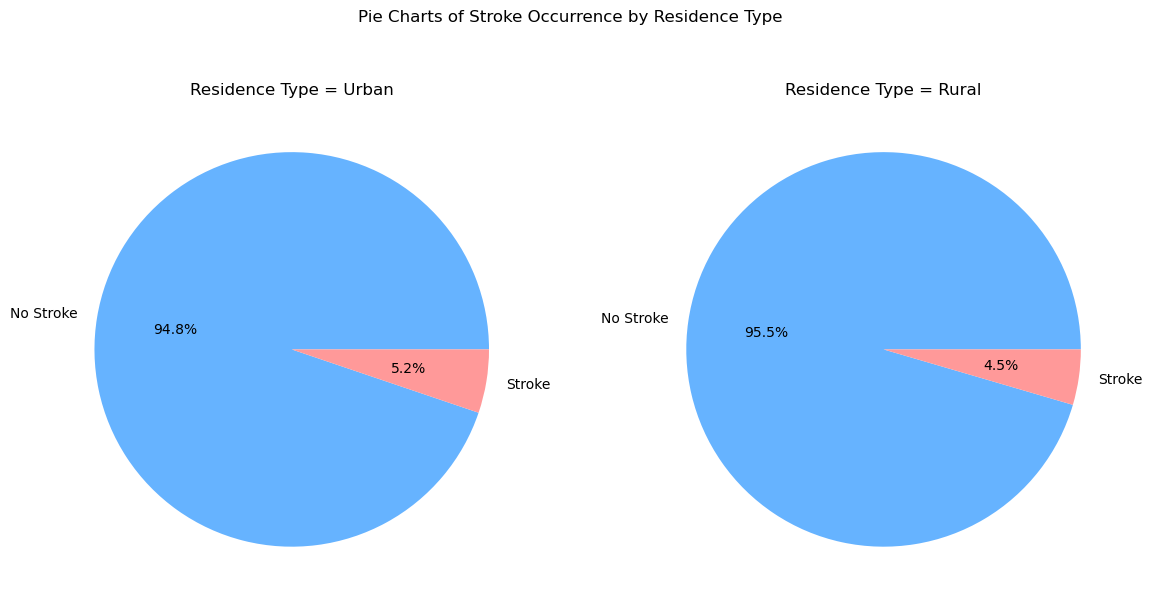

In [40]:
# Create a contingency table
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])

# Plot pie charts for each Residence_type category
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# For Residence_type = Urban
axes[0].pie(contingency_table.loc['Urban'], labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
axes[0].set_title('Residence Type = Urban')

# For Residence_type = Rural
axes[1].pie(contingency_table.loc['Rural'], labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
axes[1].set_title('Residence Type = Rural')

plt.suptitle('Pie Charts of Stroke Occurrence by Residence Type')
plt.show()

### 2.3.8 Average Glucose Level

In [41]:
Overview_avg_glucose_level = df.avg_glucose_level.describe()

print('Summary of Average Glucose Level :')
print('--------------------')
print(Overview_avg_glucose_level)
print('--------------------')

Summary of Average Glucose Level :
--------------------
count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64
--------------------


In [42]:
avg_glucose_level_stroke_counts = df.groupby(['avg_glucose_level', 'stroke']).size().unstack(fill_value=0)

for avg_glucose_level_group, row in avg_glucose_level_stroke_counts.iterrows():
    print(f"Average Glucose Level Group: {avg_glucose_level_group}")
    print("-----------------------")
    no_stroke_count = row.get(0, 0)  # Default to 0 if '0' is not a key
    stroke_count = row.get(1, 0)     # Default to 0 if '1' is not a key
    print(f"no stroke: {no_stroke_count}")
    print(f"stroke: {stroke_count}")
    print("\n")

Average Glucose Level Group: 55.12
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.22
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.23
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.25
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.26
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.27
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.28
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.32
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.34
-----------------------
no stroke: 2
stroke: 0


Average Glucose Level Group: 55.35
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.39
-----------------------
no stroke: 1
stroke: 0


Average Glucose Level Group: 55.41
-----------------------
no stroke: 1
stro

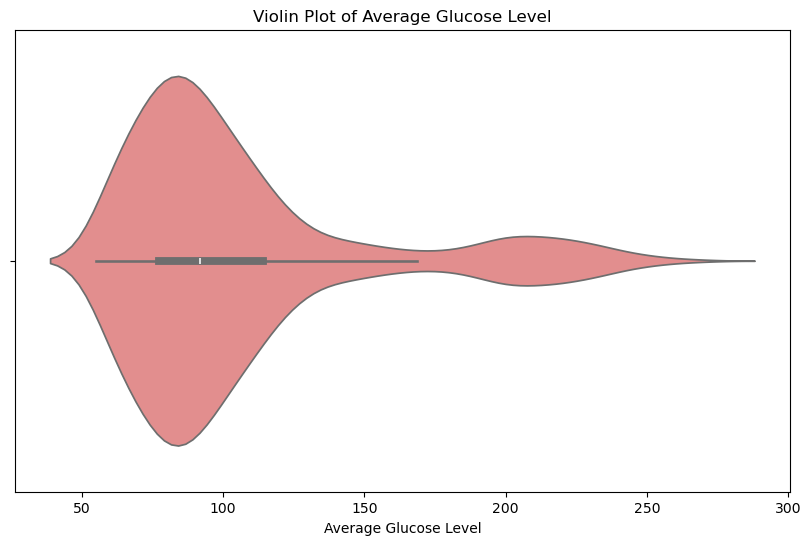

In [43]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['avg_glucose_level'], color='lightcoral')
plt.title('Violin Plot of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.show()

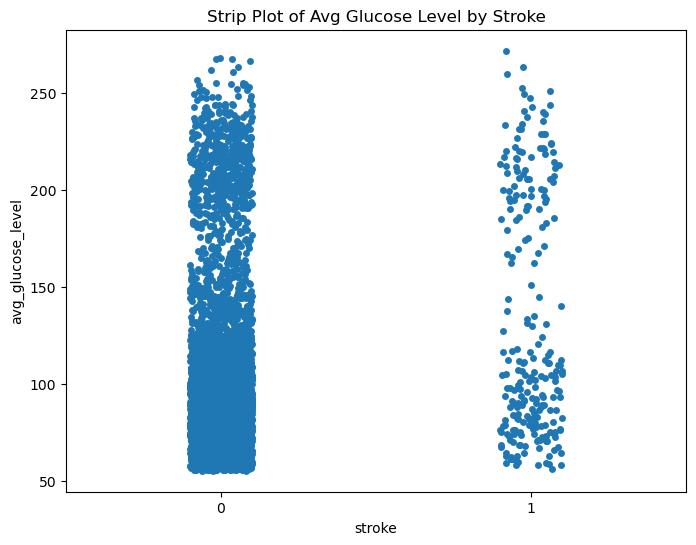

In [44]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='stroke', y='avg_glucose_level', data=df, jitter=True)
plt.title('Strip Plot of Avg Glucose Level by Stroke')
plt.show()

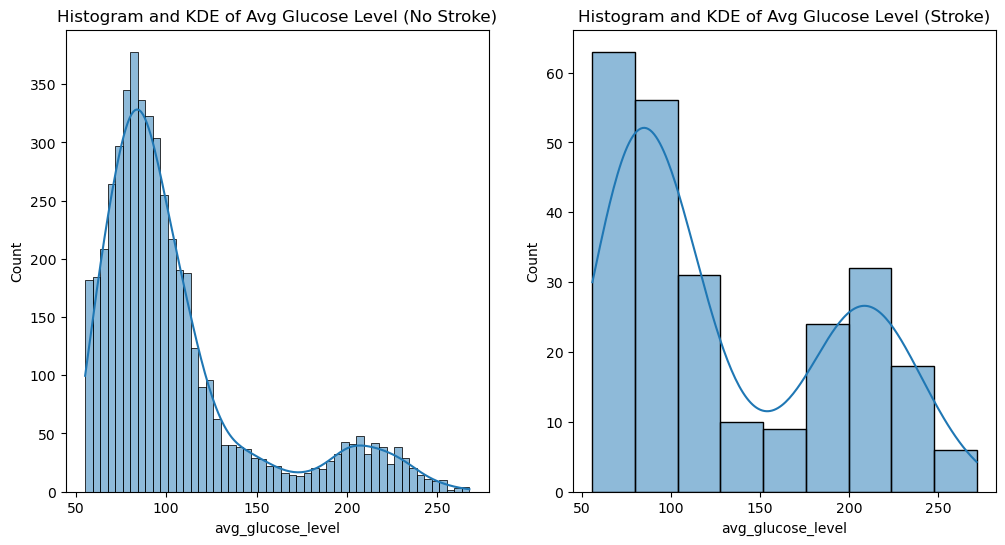

In [45]:
plt.figure(figsize=(12, 6))

# Histogram for stroke = 0
plt.subplot(1, 2, 1)
sns.histplot(df[df['stroke'] == 0]['avg_glucose_level'], kde=True)
plt.title('Histogram and KDE of Avg Glucose Level (No Stroke)')

# Histogram for stroke = 1
plt.subplot(1, 2, 2)
sns.histplot(df[df['stroke'] == 1]['avg_glucose_level'], kde=True)
plt.title('Histogram and KDE of Avg Glucose Level (Stroke)')

plt.show()

### 2.3.9 BMI

In [46]:
Overview_bmi = df.bmi.describe()

print('Summary of BMI :')
print('--------------------')
print(Overview_bmi)
print('--------------------')

Summary of BMI :
--------------------
count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64
--------------------


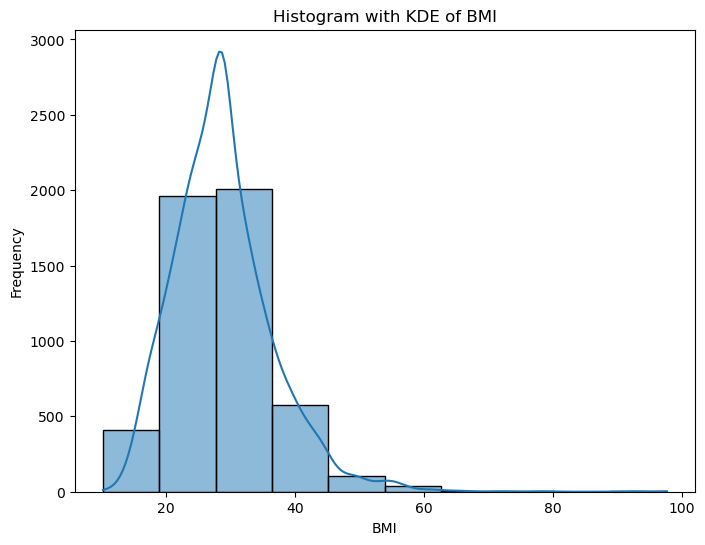

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=10, kde=True)
plt.title('Histogram with KDE of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


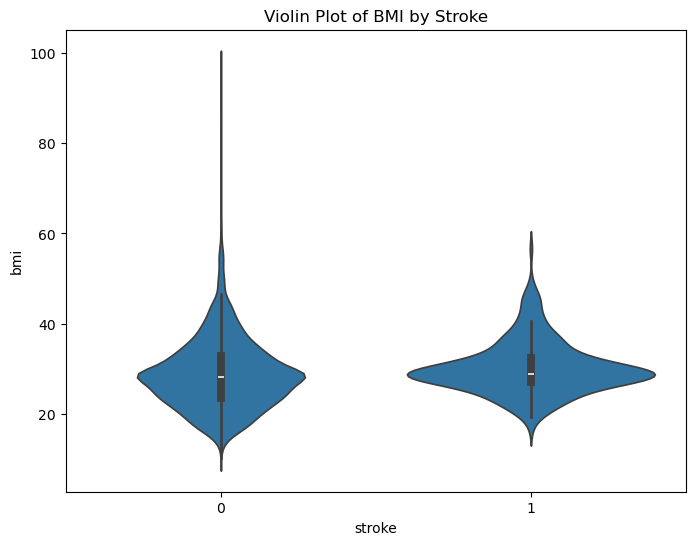

In [48]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='stroke', y='bmi', data=df)
plt.title('Violin Plot of BMI by Stroke')
plt.show()

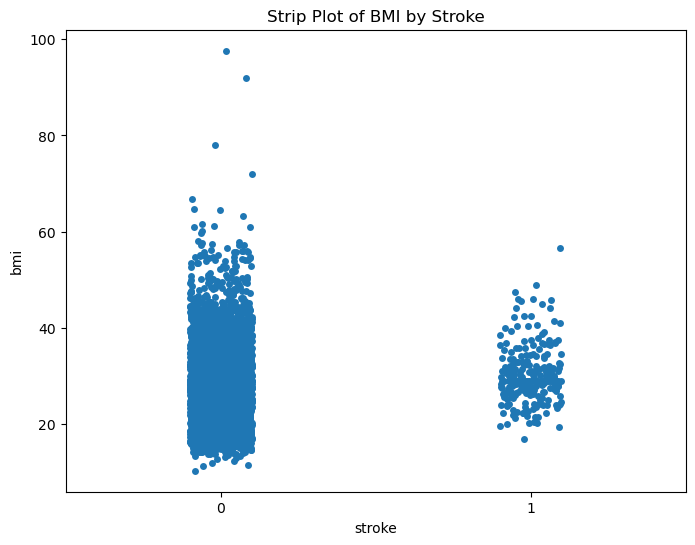

In [49]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='stroke', y='bmi', data=df, jitter=True)
plt.title('Strip Plot of BMI by Stroke')
plt.show()

### 2.3.10 Smoking Status

In [50]:
smokingStatus = df['smoking_status'].value_counts()

# Calculate total number of entries
smokingStatus_total = df['smoking_status'].value_counts().sum()

# Print results
print("Smoking Status Counts:\n", smokingStatus)
print("Total value of Smoking Status:", smokingStatus_total)

Smoking Status Counts:
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
Total value of Smoking Status: 5110


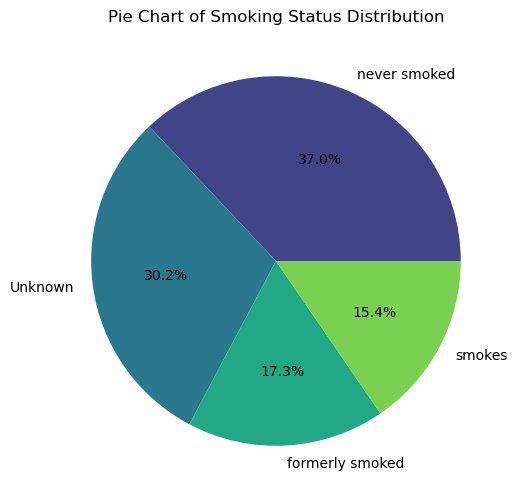

In [51]:
plt.figure(figsize=(8, 6))
df['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=4))
plt.title('Pie Chart of Smoking Status Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

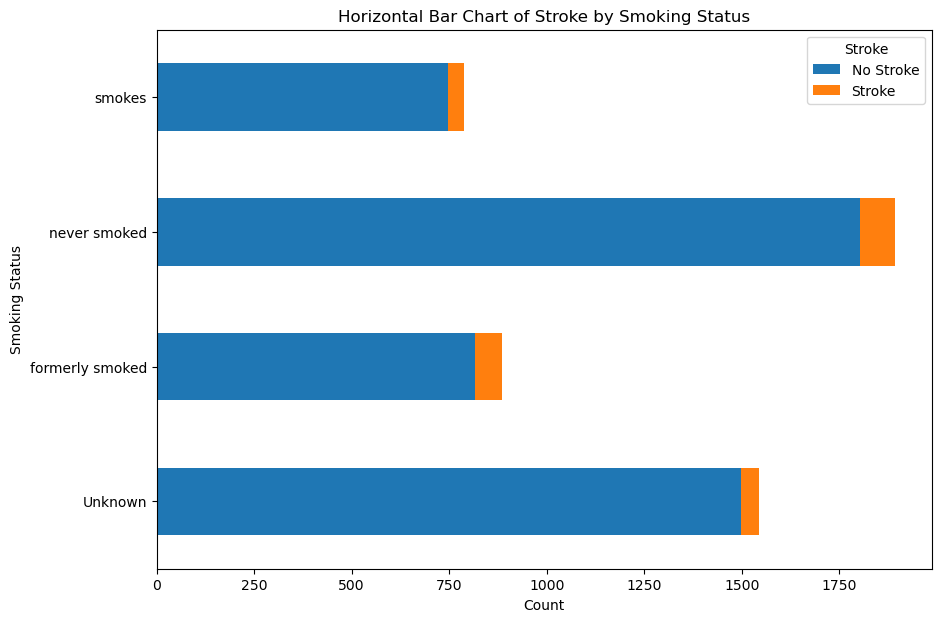

In [52]:
# Create a contingency table
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

# Plot horizontal bar chart
contingency_table.plot(kind='barh', stacked=True, figsize=(10, 7), color=['#1f77b4', '#ff7f0e'])  # Changed colors to blue and orange
plt.title('Horizontal Bar Chart of Stroke by Smoking Status')
plt.xlabel('Count')
plt.ylabel('Smoking Status')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

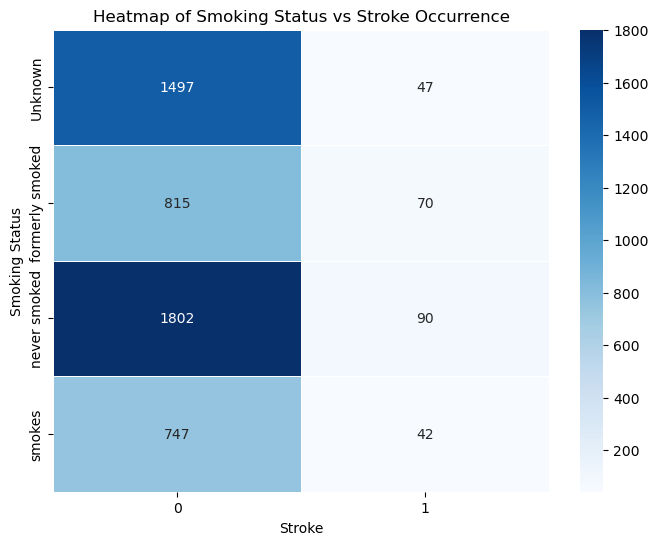

In [53]:
# Create a contingency table
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])

# Plot heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=0.5)
plt.title('Heatmap of Smoking Status vs Stroke Occurrence')
plt.xlabel('Stroke')
plt.ylabel('Smoking Status')
plt.show()

## 2.4 Dependent Variable

### 2.4.1 Stroke

In [54]:
stroke = df['stroke'].value_counts() 
stroke_total = df['stroke'].value_counts().sum()
print(stroke)
print("Total value of Stroke:", stroke_total)

stroke
0    4861
1     249
Name: count, dtype: int64
Total value of Stroke: 5110


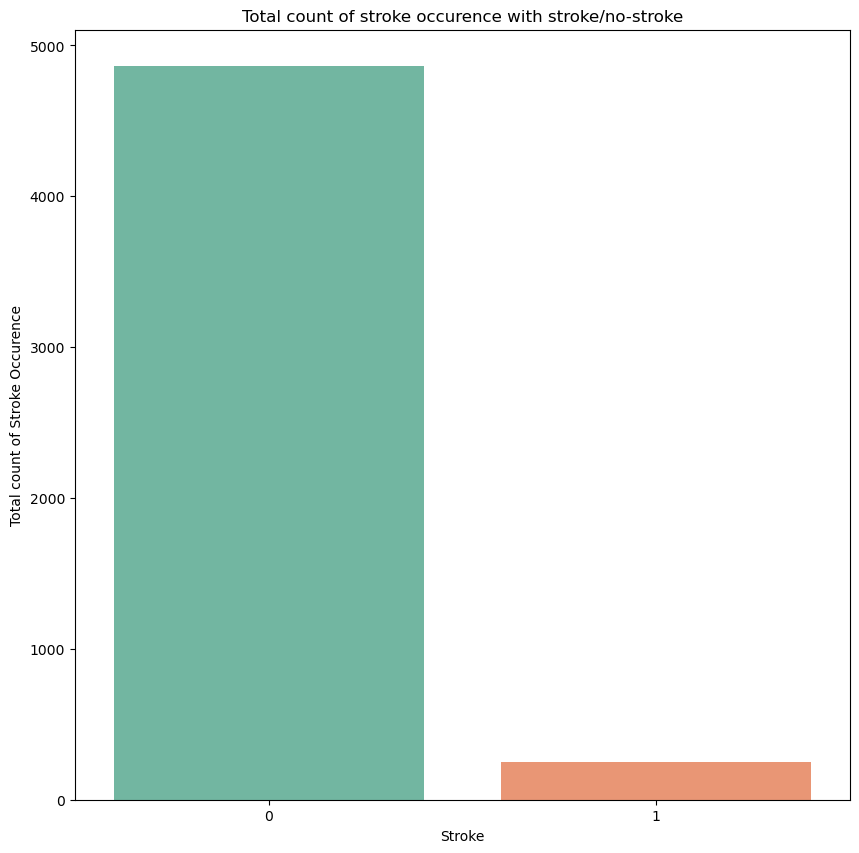

In [55]:
# Print Bar Chart 
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'stroke', palette = 'Set2')

plt.title("Total count of stroke occurence with stroke/no-stroke") 
plt.ylabel("Total count of Stroke Occurence")
plt.xlabel("Stroke")

plt.show()

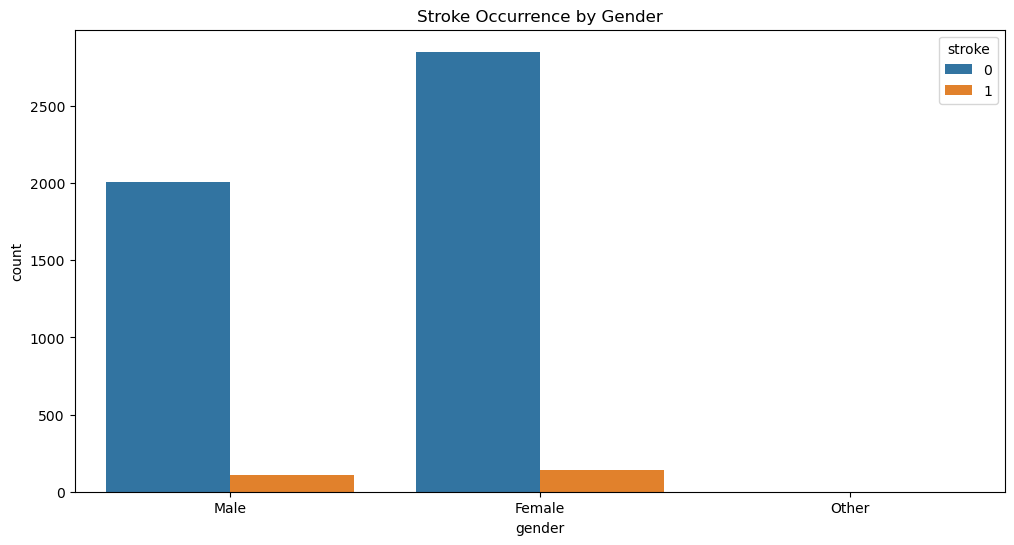

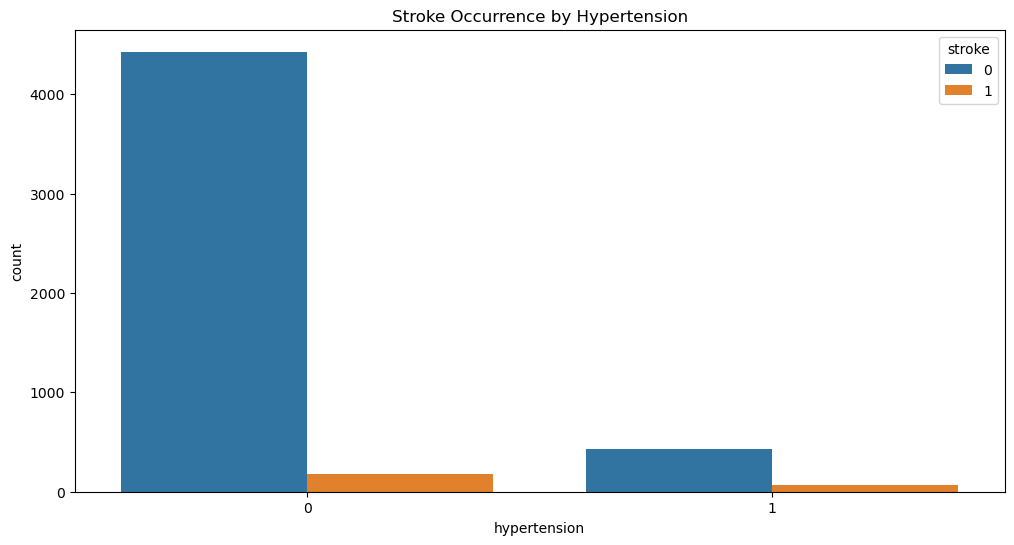

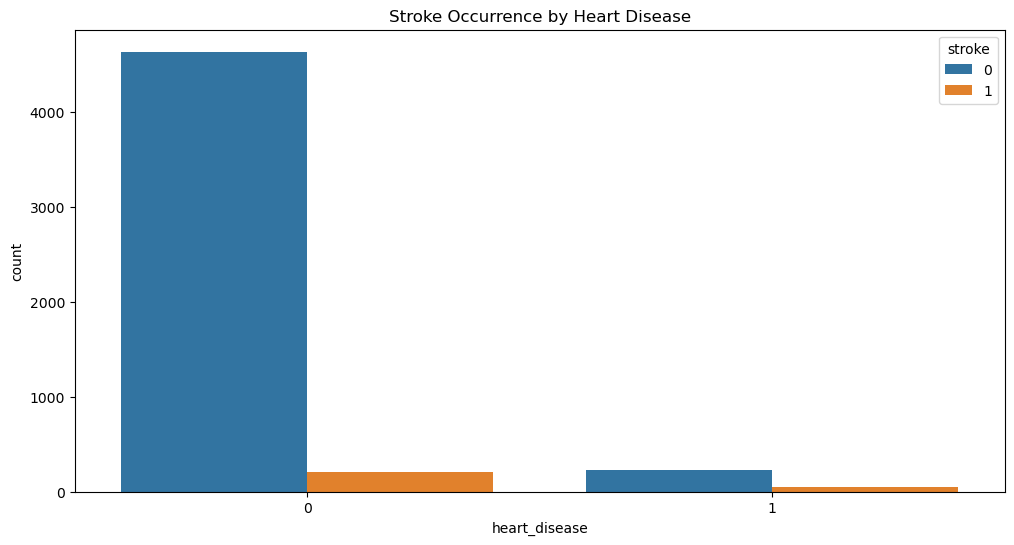

In [56]:
# Gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender', hue='stroke')
plt.title('Stroke Occurrence by Gender')
plt.show()

# Hypertension
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hypertension', hue='stroke')
plt.title('Stroke Occurrence by Hypertension')
plt.show()

# Heart Disease
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.title('Stroke Occurrence by Heart Disease')
plt.show()

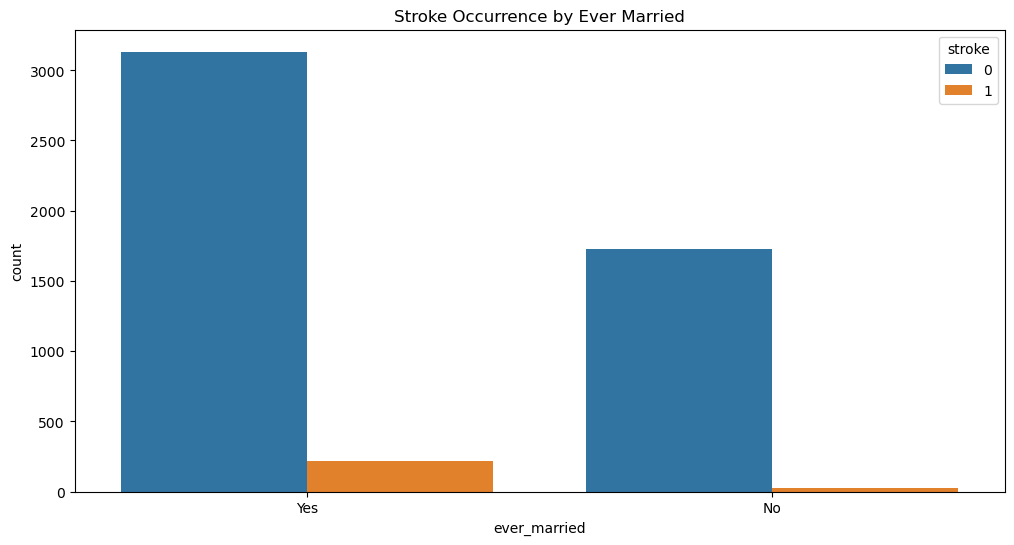

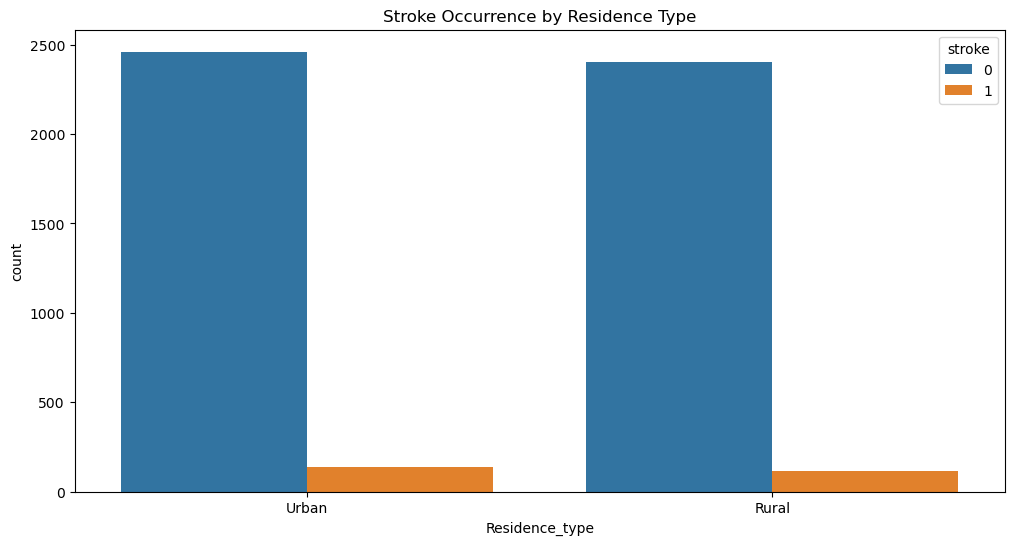

In [57]:
# Ever Married
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ever_married', hue='stroke')
plt.title('Stroke Occurrence by Ever Married')
plt.show()

# Residence Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Residence_type', hue='stroke')
plt.title('Stroke Occurrence by Residence Type')
plt.show()

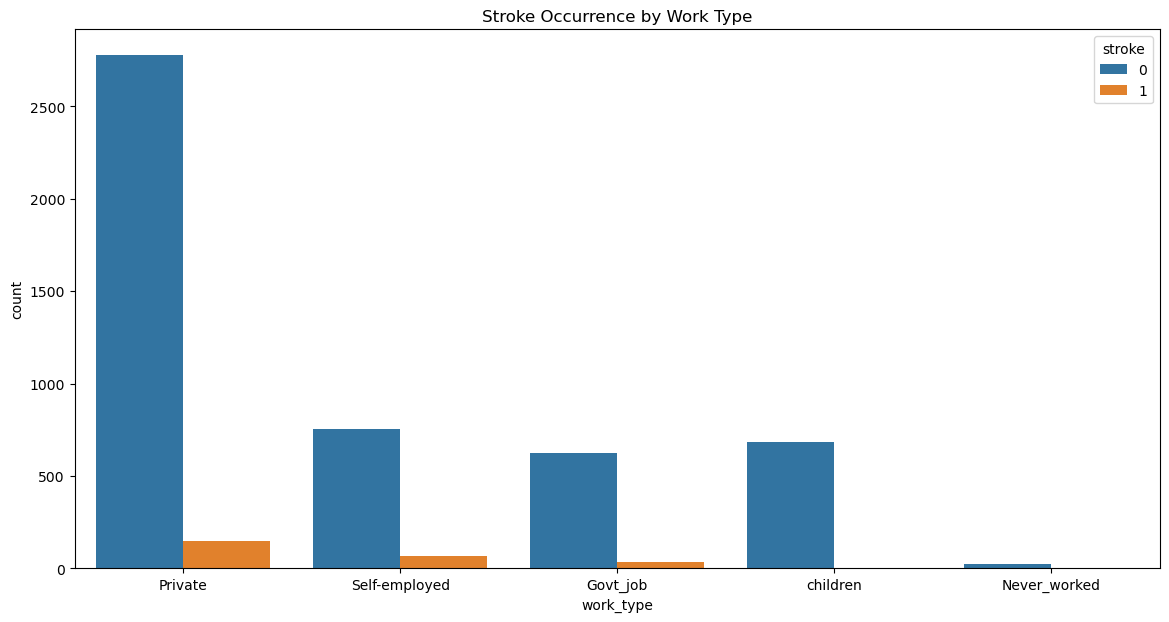

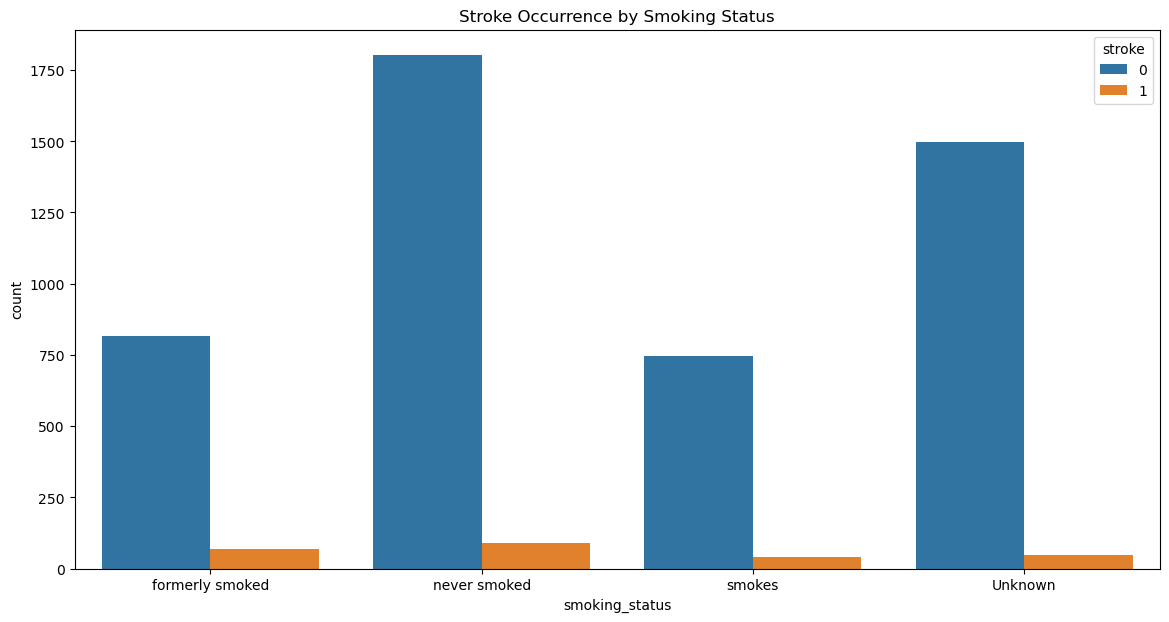

In [58]:
# Work Type
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Stroke Occurrence by Work Type')
plt.show()

# Smoking Status
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Stroke Occurrence by Smoking Status')
plt.show()

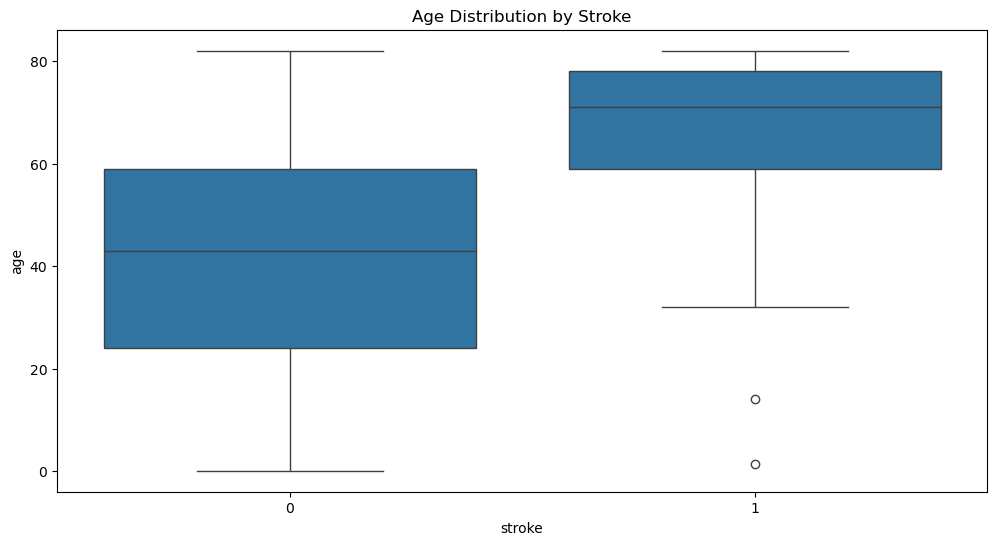

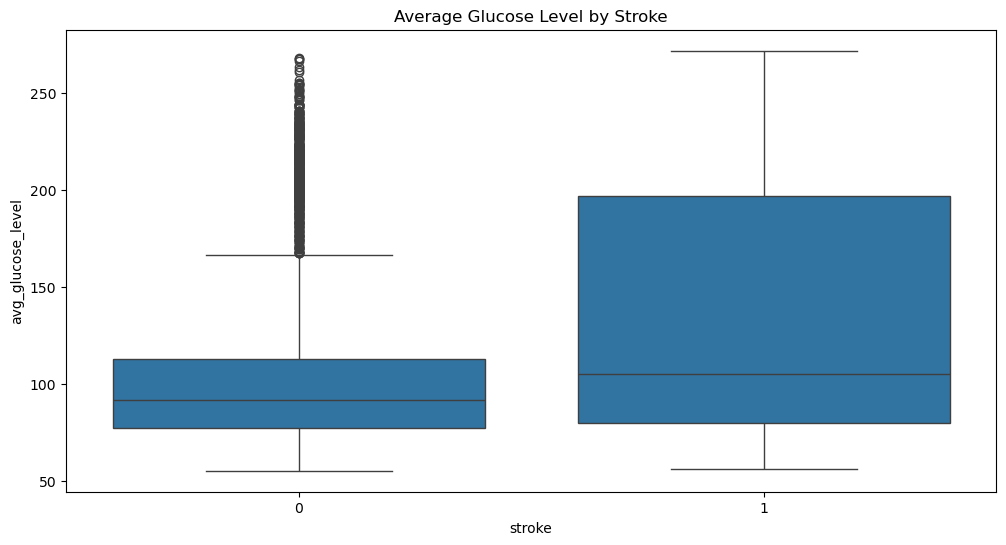

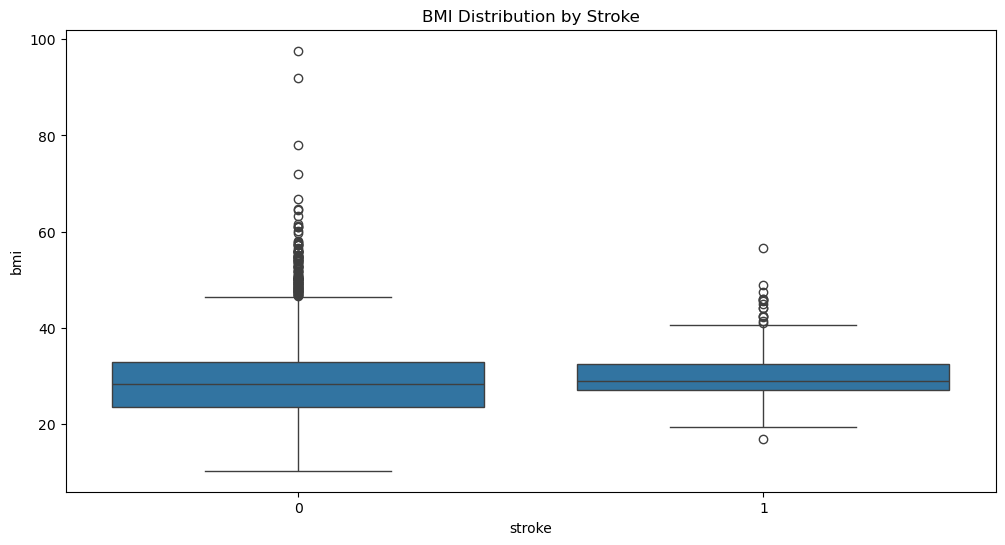

In [59]:
# Age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stroke', y='age')
plt.title('Age Distribution by Stroke')
plt.show()

# Avg Glucose Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title('Average Glucose Level by Stroke')
plt.show()

# BMI
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stroke', y='bmi')
plt.title('BMI Distribution by Stroke')
plt.show()

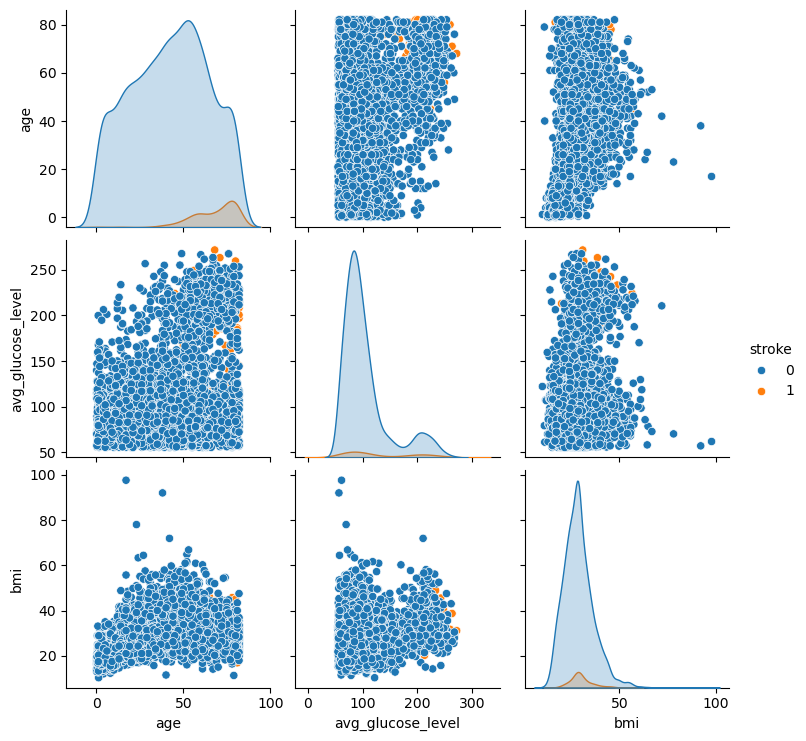

In [60]:
# Pairplot for numerical variables
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
sns.pairplot(df, hue='stroke', vars=numerical_cols)
plt.show()

# Drop the 'id' column

In [2]:
# Drop the 'id' column
df = df.drop(columns=['id'])

# Verify the changes
print(df.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  


# Replace one 'Other' of Gender Column with 'Female'

In [3]:
# Display the count of 'Other' in the gender column to check before replacement
gender_counts_before = df['gender'].value_counts()

# Replace one 'Other' with 'Female'
other_indices = df[df['gender'] == 'Other'].index
if len(other_indices) > 0:
    df.at[other_indices[0], 'gender'] = 'Female'

# Display the count of genders after replacement
gender_counts_after = df['gender'].value_counts()

gender_counts_before, gender_counts_after

(gender
 Female    2994
 Male      2115
 Other        1
 Name: count, dtype: int64,
 gender
 Female    2995
 Male      2115
 Name: count, dtype: int64)

# Check for Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Separate to numerical and categorical columns

In [5]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.drop('stroke')
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
Categorical columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


# Outlier Detection

## IQR Method

In [24]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_summary = outliers.sum()
print(outliers_summary)

age                    0
hypertension         498
heart_disease        276
avg_glucose_level    627
bmi                  110
dtype: int64


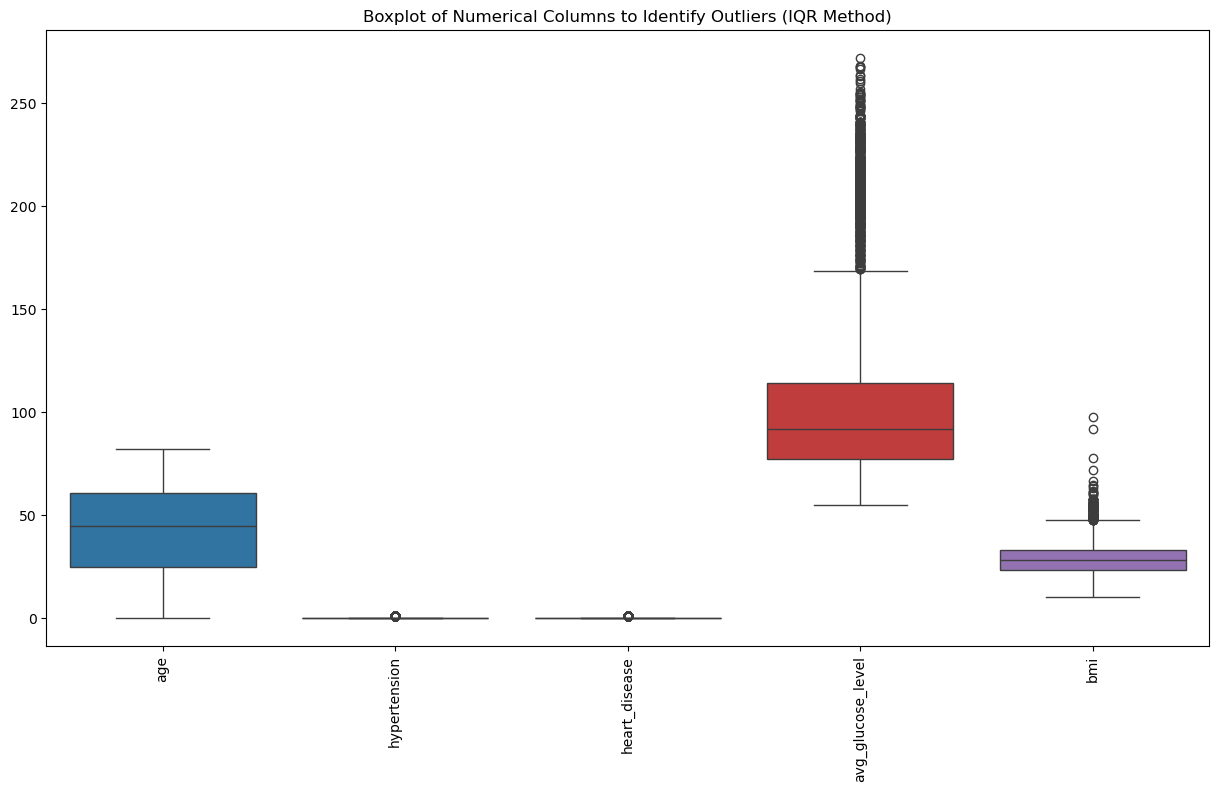

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot of Numerical Columns to Identify Outliers (IQR Method)')
plt.xticks(rotation=90)
plt.show()

# Visualize the distribution of the target variable 'stroke'

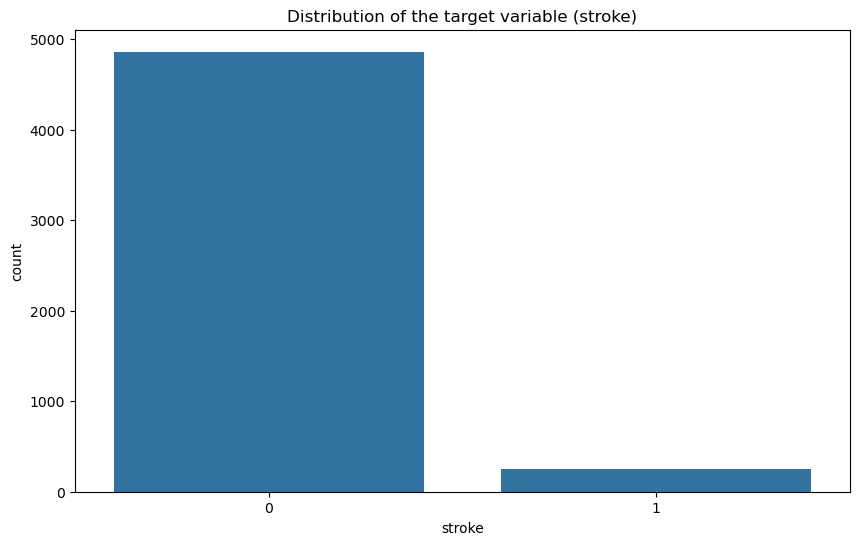

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of the target variable (stroke)')
plt.show()

# Handling missing value by mean mode imputation

In [27]:
# Fill missing values for numerical columns with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no missing values
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Separate features and target variable

In [28]:
# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Display the features and target variable
print(X.head())
print(y.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  
0          Urban             228.69  36.600000  formerly smoked  
1          Rural             202.21  28.893237     never smoked  
2          Rural             105.92  32.500000     never smoked  
3          Urban             171.23  34.400000           smokes  
4          Rural             174.12  24.000000     never smoked  
0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


# Split data into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (3577, 10)
Testing data shape: (1533, 10)


# SMOTE

In [30]:
import pandas as pd

# One-hot encode the categorical columns in the training set
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)

# Similarly, encode the categorical columns in the test set
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Ensure that both train and test sets have the same columns after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [31]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the encoded training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# Display the shape after SMOTE
print("SMOTE training data shape:", X_train_smote.shape)
print("SMOTE training target shape:", y_train_smote.shape)

SMOTE training data shape: (6834, 20)
SMOTE training target shape: (6834,)


# Feature Scaling and Encoding Pipeline

## Perform Standard Scaler for numerical data

## Perform One-Hot Encoding for categorical data

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Ensure numerical_cols and categorical_cols match the actual columns in X_train_smote
numerical_cols = X_train_smote.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train_smote.select_dtypes(include=['object', 'category']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train_smote)

# Transform the test data
X_test_preprocessed = preprocessor.transform(X_test_encoded)

# Apply PCA

In [33]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
pca = PCA(random_state=42)

# Apply PCA on the SMOTE-resampled and preprocessed training data
X_train_pca = pca.fit_transform(X_train_preprocessed)

# Apply PCA on the preprocessed test data
X_test_pca = pca.transform(X_test_preprocessed)

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Display the shape of the PCA-transformed data
print("PCA-transformed training data shape:", X_train_pca.shape)
print("PCA-transformed testing data shape:", X_test_pca.shape)

Explained variance ratio: [0.32431419 0.19458926 0.18851804 0.15182536 0.14075315]
PCA-transformed training data shape: (6834, 5)
PCA-transformed testing data shape: (1533, 5)


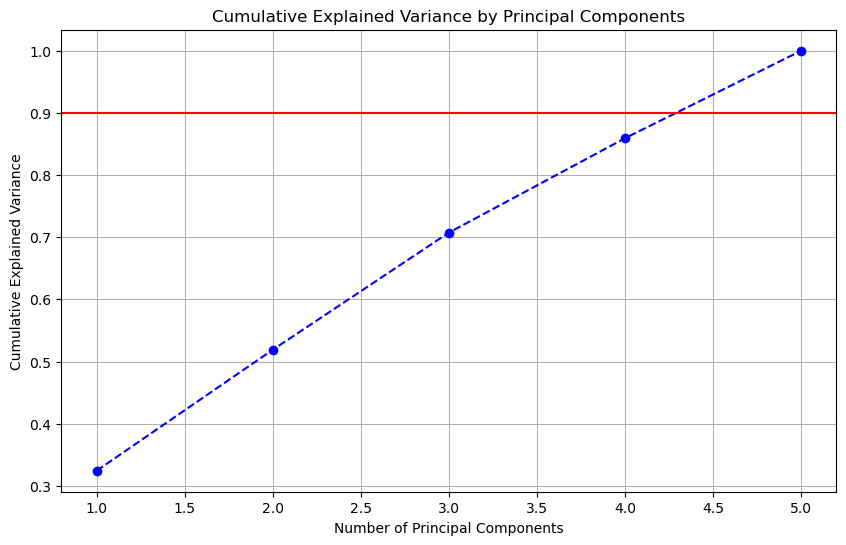

Number of components to explain 90% variance: 5


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-')  # Adding a reference line for 90% explained variance
plt.show()

# Optionally, print the explained variance for specific cutoffs like 90%
explained_variance_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1  # Find number of components for 90% variance
print(f'Number of components to explain 90% variance: {explained_variance_90}')

# SVM

## Hyperparameter Tuning 

In [96]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the SVM model
svm_model = SVC(probability=True)

# Define the parameter distribution to search over
param_dist = {
    'C': stats.uniform(1, 10),  # Regularization parameter
    'gamma': stats.uniform(0.01, 0.1),  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'sigmoid'],  # Kernel types
    'degree': [2, 3, 4, 5]  # Degree for 'poly' kernel
}

# Set up the RandomizedSearchCV with cross-validation
randomized_search = RandomizedSearchCV(svm_model, param_dist, n_iter=50, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1, random_state=42)

# Fit the model to the data
randomized_search.fit(X_train_pca, y_train_smote)

# Get the best parameters and the best score from the randomized search
best_params = randomized_search.best_params_
best_score = randomized_search.best_score_

# Print the best parameters
print("Best Parameters found by RandomizedSearchCV:")
print(best_params)
print(f"Best cross-validation F1 score: {best_score:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters found by RandomizedSearchCV:
{'C': 9.287375091519294, 'degree': 3, 'gamma': 0.1065255307264138, 'kernel': 'rbf'}
Best cross-validation F1 score: 0.80


## Calculate evaluation metrics

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# Train the SVM model with the best parameters
best_svm_model = randomized_search.best_estimator_

# Predict on the training set and testing set
y_train_pred_svm = best_svm_model.predict(X_train_pca)
y_test_pred_svm = best_svm_model.predict(X_test_pca)

# Calculate evaluation metrics
svm_metrics = {
    'Train Accuracy': accuracy_score(y_train_smote, y_train_pred_svm) * 100,
    'Test Accuracy': accuracy_score(y_test, y_test_pred_svm) * 100,
}

# Print the metrics
print("Support Vector Machine (SVM) Classifier Metrics (After Hyperparameter Tuning):")
print(f"Accuracy: {svm_metrics['Test Accuracy']:.2f}%")
print(f"Train Accuracy: {svm_metrics['Train Accuracy']:.2f}%")

Support Vector Machine (SVM) Classifier Metrics (After Hyperparameter Tuning):
Accuracy: 74.56%
Train Accuracy: 81.28%


## Confusion Matrix of SVM

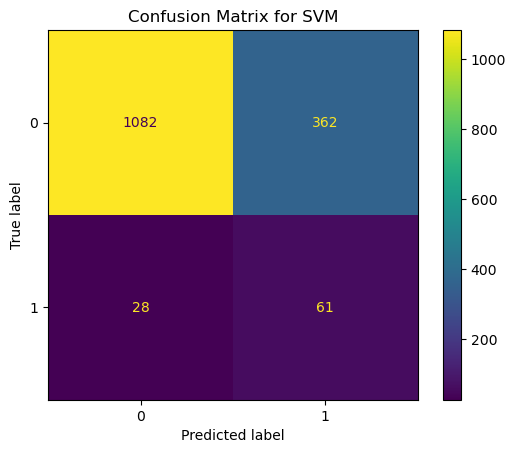

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm)
plt.title('Confusion Matrix for SVM')
plt.show()

## SVM ROC

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC AUC using the best fitted model
roc_auc = roc_auc_score(y_test, best_svm_model.predict_proba(X_test_pca)[:, 1]) * 100

# Print the ROC AUC separately
print(f"SVM AUC: {roc_auc:.2f}%")

SVM AUC: 78.70%


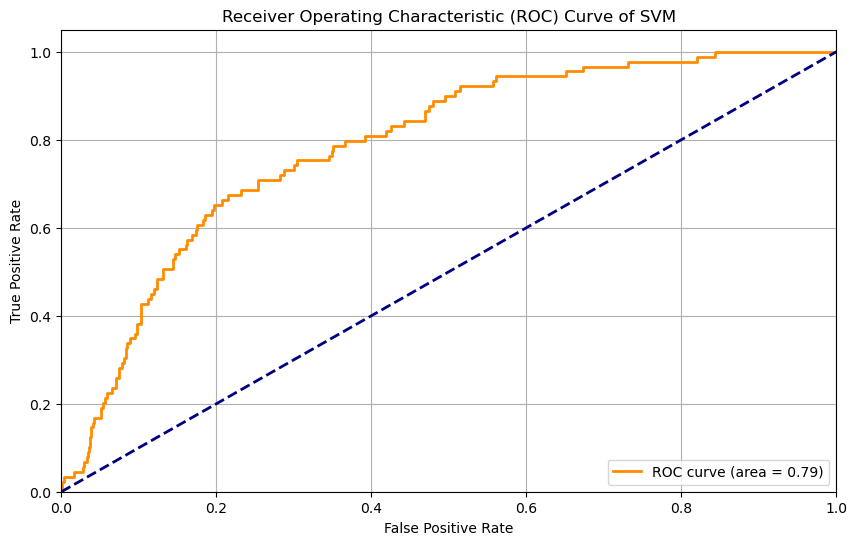

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities using the best fitted model
y_test_proba = best_svm_model.predict_proba(X_test_pca)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Log Loss

In [101]:
from sklearn.metrics import log_loss

# Calculate Log Loss using the fitted model
svm_log_loss = log_loss(y_test, best_svm_model.predict_proba(X_test_pca))

# Print the Log Loss
print(f"Log Loss: {svm_log_loss:.2f}")

Log Loss: 0.46


## Learning Curve SVM

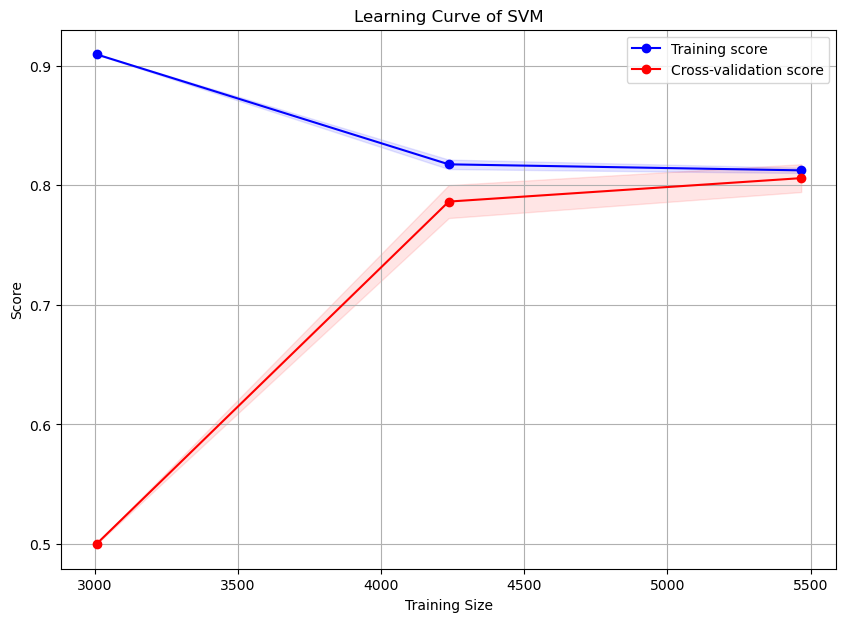

In [102]:
# Learning Curve
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Use the best model obtained from the RandomizedSearchCV or GridSearchCV
train_sizes, train_scores, test_scores = learning_curve(best_svm_model, X_train_pca, y_train_smote, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of SVM')
plt.legend()
plt.grid(True)
plt.show()

# Neural Network

## Hyperparameter Tuning (Execution time approximately 40 mintues+)

In [85]:
import warnings
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings("ignore")

# Define the parameter distribution
param_dist = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 32, 16)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(MLPClassifier(random_state=42, max_iter=500), param_distributions=param_dist, n_iter=50, cv=5, scoring='f1_weighted', verbose=1, random_state=42)

# Perform the random search
random_search.fit(X_train_pca, y_train_smote)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation F1 score: {best_score:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'solver': 'sgd', 'learning_rate_init': 0.1, 'hidden_layer_sizes': (64, 32, 16), 'alpha': 0.0001, 'activation': 'tanh'}
Best cross-validation F1 score: 0.89


## Calculate evaluation metrics

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Train the Neural Network model with the best parameters
best_nn_model = random_search.best_estimator_

# Predict on the training set and testing set
y_train_pred_nn = best_nn_model.predict(X_train_pca)
y_test_pred_nn = best_nn_model.predict(X_test_pca)

# Calculate evaluation metrics
nn_metrics = {
    'Train Accuracy': accuracy_score(y_train_smote, y_train_pred_nn) * 100,
    'Test Accuracy': accuracy_score(y_test, y_test_pred_nn) * 100,
}

# Print the metrics
print("Neural Network Classifier Metrics (After Hyperparameter Tuning):")
print(f"Accuracy: {nn_metrics['Test Accuracy']:.2f}%")
print(f"Train Accuracy: {nn_metrics['Train Accuracy']:.2f}%")

Neural Network Classifier Metrics (After Hyperparameter Tuning):
Accuracy: 81.74%
Train Accuracy: 88.78%


## Confusion Matrix of Neural Network

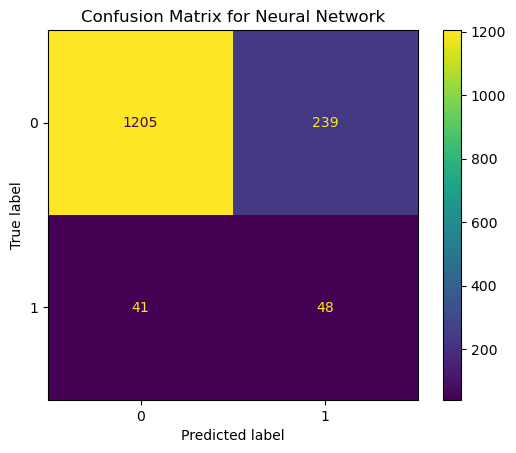

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_nn)
plt.title('Confusion Matrix for Neural Network')
plt.show()

## Neural Network ROC

In [89]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, best_nn_model.predict_proba(X_test_pca)[:, 1]) * 100

print(f"ROC AUC: {roc_auc:.2f}%")

ROC AUC: 78.39%


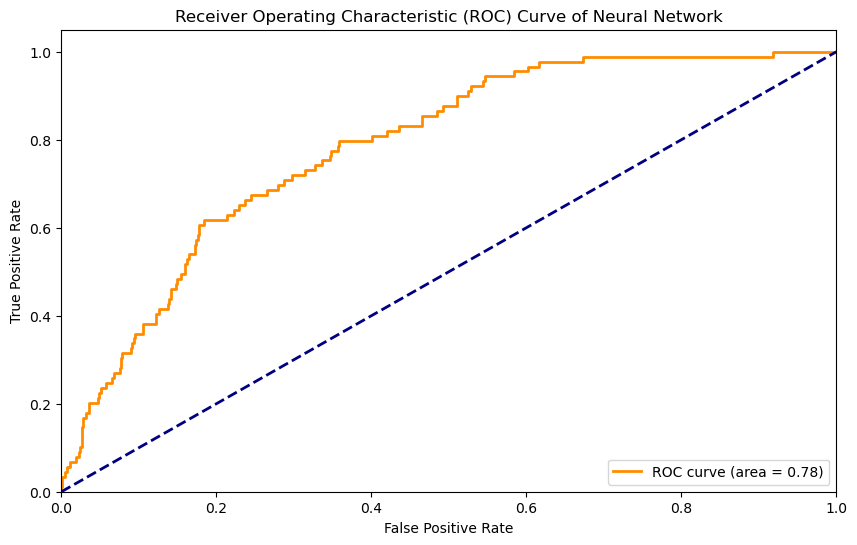

In [90]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_test_proba = best_nn_model.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Neural Network')
plt.legend(loc="lower right")
plt.show()

## Log Loss

In [91]:
from sklearn.metrics import log_loss
rf_log_loss = log_loss(y_test, best_nn_model.predict_proba(X_test_pca))
print(f"Log Loss: {rf_log_loss:.2f}")

Log Loss: 0.45


## Learning Curve Neural Network

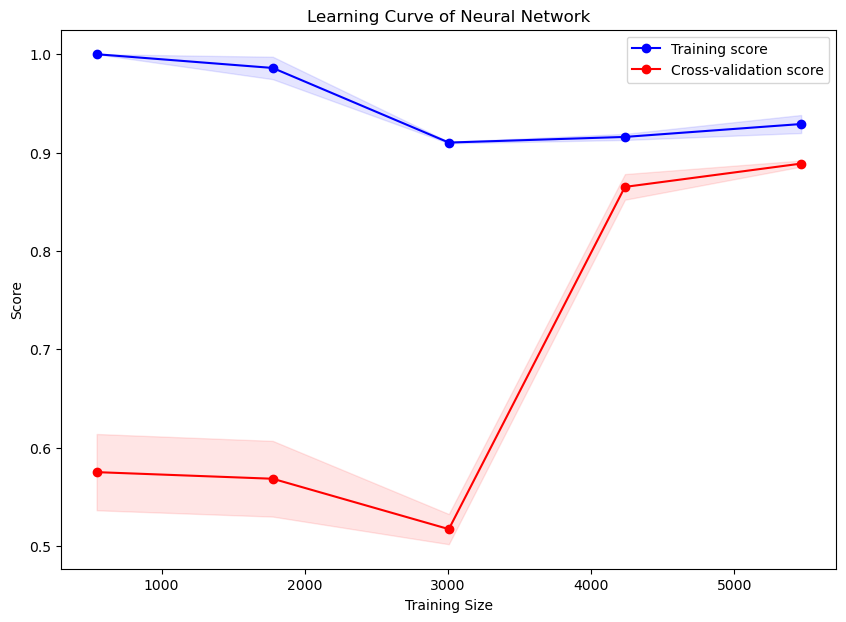

In [92]:
# Learning Curve
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_nn_model, X_train_pca, y_train_smote, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of Neural Network')
plt.legend()
plt.show()

# Gradient Boosting

## Hyperparameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter distribution to search over
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring='f1_weighted', verbose=1, random_state=42, n_jobs=-1)

# Perform the random search
random_search.fit(X_train_pca, y_train_smote)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation F1 score: {best_score:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Best cross-validation F1 score: 0.88


## Calculate evaluation metrics

In [75]:
# Train the Gradient Boosting model with the best parameters
best_gb_model = random_search.best_estimator_

# Predict on the training set and testing set
y_train_pred_gb = best_gb_model.predict(X_train_pca)
y_test_pred_gb = best_gb_model.predict(X_test_pca)

# Calculate evaluation metrics
gb_metrics = {
    'Train Accuracy': accuracy_score(y_train_smote, y_train_pred_gb) * 100,
    'Test Accuracy': accuracy_score(y_test, y_test_pred_gb) * 100,
}

# Print the metrics
print("Gradient Boosting Classifier Metrics (After Hyperparameter Tuning):")
print(f"Accuracy: {gb_metrics['Test Accuracy']:.2f}%")
print(f"Train Accuracy: {gb_metrics['Train Accuracy']:.2f}%")

Gradient Boosting Classifier Metrics (After Hyperparameter Tuning):
Accuracy: 81.60%
Train Accuracy: 96.37%


## Confusion Matrix of Gradient Boosting

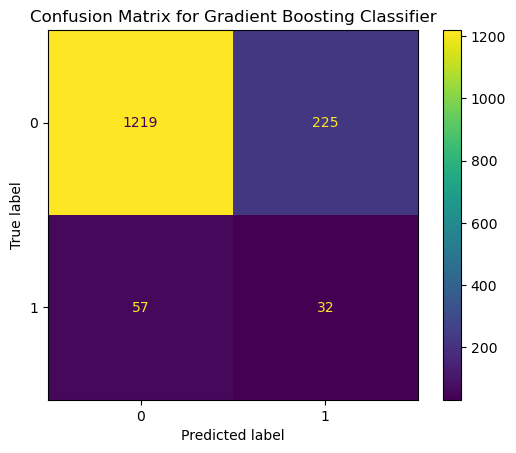

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix for Gradient Boosting
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_gb)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## Gradient Boosting ROC

In [77]:
# Calculate ROC AUC for Gradient Boosting
roc_auc_gb = roc_auc_score(y_test, best_gb_model.predict_proba(X_test_pca)[:, 1]) * 100

# Print the ROC AUC score
print(f"ROC AUC: {roc_auc_gb:.2f}%")

ROC AUC: 74.44%


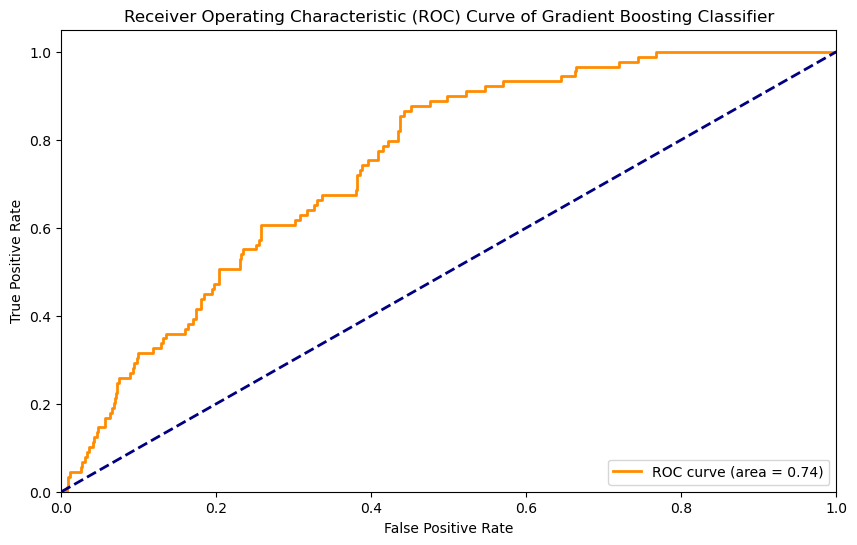

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class using the Gradient Boosting model
y_test_proba_gb = best_gb_model.predict_proba(X_test_pca)[:, 1]

# Calculate the false positive rate and true positive rate
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_test_proba_gb)
roc_auc_value_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

## Log Loss

In [79]:
from sklearn.metrics import log_loss

# Calculate log loss for the Gradient Boosting model
gb_log_loss = log_loss(y_test, best_gb_model.predict_proba(X_test_pca))

# Print the log loss score
print(f"Log Loss: {gb_log_loss:.2f}")

Log Loss: 0.40


## Learning Curve Decision Tree

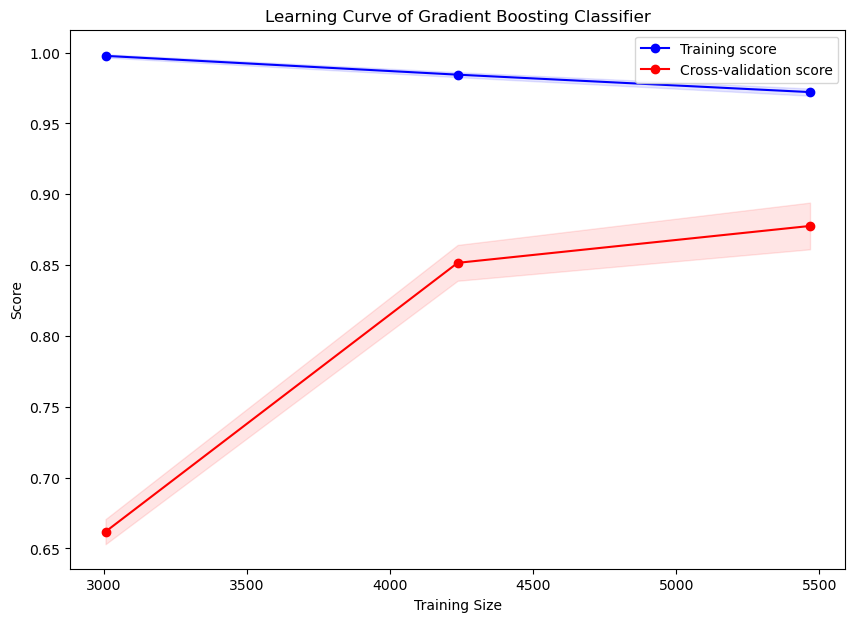

In [80]:
# Learning Curve for Gradient Boosting
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_gb_model, 
    X_train_pca, 
    y_train_smote, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Compute the mean and standard deviation of training and cross-validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')

# Fill the area between the mean scores +/- std deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

# Set plot labels and title
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve of Gradient Boosting Classifier')
plt.legend()
plt.show()

# Compare the results of different classification methods

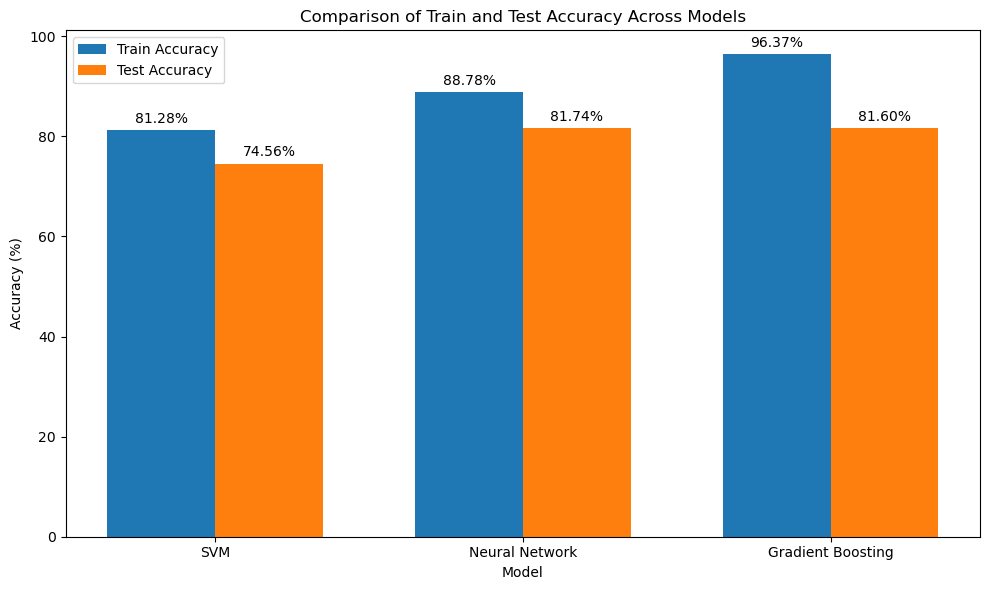

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics from the three models
models = ['SVM', 'Neural Network', 'Gradient Boosting']
train_accuracies = [svm_metrics['Train Accuracy'], nn_metrics['Train Accuracy'], gb_metrics['Train Accuracy']]
test_accuracies = [svm_metrics['Test Accuracy'], nn_metrics['Test Accuracy'], gb_metrics['Test Accuracy']]

# Setting up the plot
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Train and Test Accuracy Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


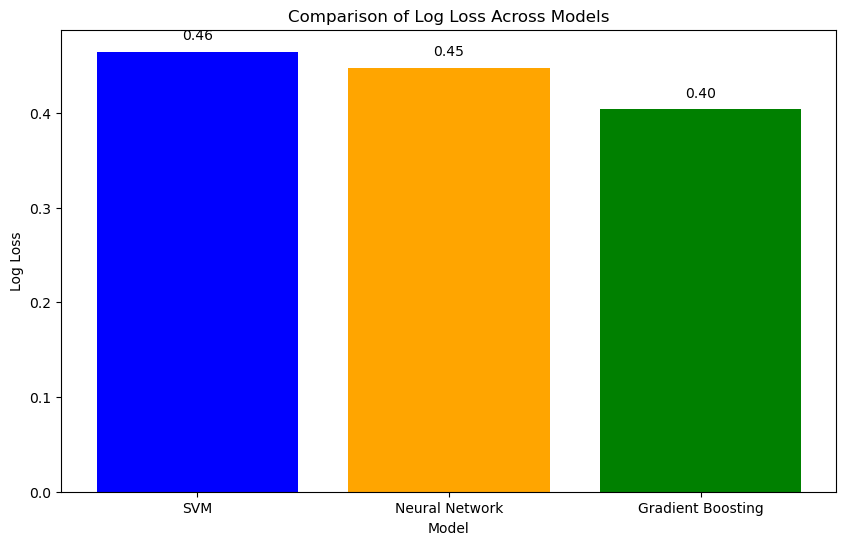

In [104]:
import matplotlib.pyplot as plt

# Log loss values for the three models
models = ['SVM', 'Neural Network', 'Gradient Boosting']
log_losses = [svm_log_loss, rf_log_loss, gb_log_loss]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, log_losses, color=['blue', 'orange', 'green'])

# Adding titles and labels
plt.title('Comparison of Log Loss Across Models')
plt.xlabel('Model')
plt.ylabel('Log Loss')

# Display the log loss values on top of the bars
for i, v in enumerate(log_losses):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Save the Best Model

In [93]:
import joblib

# Save the trained Neural Network model and preprocessor
model_filename = 'C:/Users/User/AI ASSIGNMENT/trained_neural_network.joblib'
preprocessor_filename = 'C:/Users/User/AI ASSIGNMENT/preprocessor.joblib'
joblib.dump(best_nn_model, model_filename)  # Save the best Neural Network model
joblib.dump(preprocessor, preprocessor_filename)  # Save the preprocessor

['C:/Users/User/AI ASSIGNMENT/preprocessor.joblib']